In [1]:
#import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import neattext.functions as nfx
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('realdonaldtrump.csv')
data.columns

Index(['id', 'link', 'content', 'date', 'retweets', 'favorites', 'mentions',
       'hashtags'],
      dtype='object')

In [3]:
df = pd.DataFrame(data['content'])
df.rename(columns={'content':'Tweet'},inplace=True)

In [4]:
pd.set_option('display.max_colwidth',None)

In [5]:
df.head(20)

Tweet
0                 Be sure to tune in and watch Donald Trump on Late Night with David Letterman as he presents the Top Ten List tonight!
1   Donald Trump will be appearing on The View tomorrow morning to discuss Celebrity Apprentice and his new book Think Like A Champion!
2                  Donald Trump reads Top Ten Financial Tips on Late Show with David Letterman: http://tinyurl.com/ooafwn - Very funny!
3                               New Blog Post: Celebrity Apprentice Finale and Lessons Learned Along the Way: http://tinyurl.com/qlux5e
4                         "My persona will never be that of a wallflower - I’d rather build walls than cling to them" --Donald J. Trump
5                           Miss USA Tara Conner will not be fired - "I've always been a believer in second chances." says Donald Trump
6                    Listen to an interview with Donald Trump discussing his new book, Think Like A Champion: http://tinyurl.com/qs24vl
7                              "Strive for wholeness and keep your sense of wonder intact." --Donald J. Trump http://tinyurl.com/pqpfvm
8                   Enter the "Think Like A Champion" signed book and keychain contest: http://www.trumpthinklikeachampion.com/contest/
9                       "When the achiever achieves, it's not a plateau, it’s a beginning." --Donald J. Trump http://tinyurl.com/pqpfvm
10            "Don’t be afraid of being unique - it's like being afraid of your best self." --Donald J. Trump http://tinyurl.com/pqpfvm
11                        "We win in our lives by having a champion's view of each moment." --Donald J. Trump http://tinyurl.com/pqpfvm
12       "...these days...we could all use a little of the power of Trumpative thinking." –BarnesandNoble.com http://tinyurl.com/pqpfvm
13                          "Always know you could be on the precipice of something great." --Donald J. Trump http://tinyurl.com/pqpfvm
14                     Read a great interview with Donald Trump that appeared in The New York Times Magazine: http://tinyurl.com/qsx4o6
15                                       "Keep it fast, short and direct - whatever it is." --Donald J. Trump http://tinyurl.com/pqpfvm
16   Don't forget to enter the "Think Like A Champion" signed book and keychain contest: http://www.trumpthinklikeachampion.com/contest
17                                  Did you know Donald Trump is on Facebook? http://www.facebook.com/DonaldTrump - Become a fan today!
18                         "Your higher self is in direct opposition to your comfort zone." --Donald J. Trump http://tinyurl.com/pqpfvm
19                                                  Read an excerpt from Think Like A Champion by Donald J. Trump: http://bit.ly/11FHpR

In [6]:
# Clean the text
# Create a function to clean the tweets

def cleantext(text):
    
    text = re.sub(r'@[A-Za-z0-9]+','',text) # Remove @mentions
    text = re.sub(r'#','',text) # removes '#' symbols
    text =  re.sub('_',' ', text)# Removes _
    text = re.sub(r'RT[\s]+','',text) # Removes retweets
    text = re.sub(r'https?:\/\/\S+','',text) # Removes hyperlink
    text = re.sub(r'[^\x00-\x7F]+',' ', text) #remove_non_ascii
    text = text.lower()#cvt_lower
    text = text.translate(str.maketrans('','',r'''!()-[]{};:'"\,<>./?@$%^&*~'''))#remove_puncs
 
    text = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"
        u"\U0001F300-\U0001F5FF"
        u"\U0001F680-\U0001F6FF"
        u"\U0001F1E0-\U0001F1FF"
                           "]+", flags = re.UNICODE).sub(r'',text)# remove emojies  
    return text

def remove_unnecessary(text):
    
    # removing some unnecessary parts of tweets
    text = text.replace(' donald j trump','')
    text = text.replace(' donald trump','')
    text = text.replace('realdonaldtrump','')
    return text
 
df['Tweet']=df['Tweet'].apply(cleantext)
df['Tweet']=df['Tweet'].apply(remove_unnecessary)

In [7]:
#show the cleaned text
df.head(20)



Tweet
0                              be sure to tune in and watch on late night with david letterman as he presents the top ten list tonight
1   donald trump will be appearing on the view tomorrow morning to discuss celebrity apprentice and his new book think like a champion
2                                             donald trump reads top ten financial tips on late show with david letterman   very funny
3                                                         new blog post celebrity apprentice finale and lessons learned along the way 
4                                             my persona will never be that of a wallflower  i d rather build walls than cling to them
5                                            miss usa tara conner will not be fired  ive always been a believer in second chances says
6                                                           listen to an interview with discussing his new book think like a champion 
7                                                                           strive for wholeness and keep your sense of wonder intact 
8                                                                    enter the think like a champion signed book and keychain contest 
9                                                                       when the achiever achieves its not a plateau it s a beginning 
10                                                           don t be afraid of being unique  its like being afraid of your best self 
11                                                                      we win in our lives by having a champions view of each moment 
12                                         these dayswe could all use a little of the power of trumpative thinking  barnesandnoblecom 
13                                                                       always know you could be on the precipice of something great 
14                                                           read a great interview with that appeared in the new york times magazine 
15                                                                                      keep it fast short and direct  whatever it is 
16                                                    dont forget to enter the think like a champion signed book and keychain contest 
17                                                                                    did you know is on facebook   become a fan today
18                                                                      your higher self is in direct opposition to your comfort zone 
19                                                                                      read an excerpt from think like a champion by

In [9]:
# Create a funcion to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# Create a funcion to get the polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

# Create two new columns
df['subjectivity'] = df['Tweet'].apply(getSubjectivity)
df['polarity'] = df['Tweet'].apply(getPolarity)

In [13]:
df.head()

Tweet  \
0                             be sure to tune in and watch on late night with david letterman as he presents the top ten list tonight   
1  donald trump will be appearing on the view tomorrow morning to discuss celebrity apprentice and his new book think like a champion   
2                                            donald trump reads top ten financial tips on late show with david letterman   very funny   
3                                                        new blog post celebrity apprentice finale and lessons learned along the way    
4                                            my persona will never be that of a wallflower  i d rather build walls than cling to them   

   subjectivity  polarity  
0      0.497222  0.175000  
1      0.454545  0.136364  
2      0.420000  0.105000  
3      0.454545  0.136364  
4      0.000000  0.000000

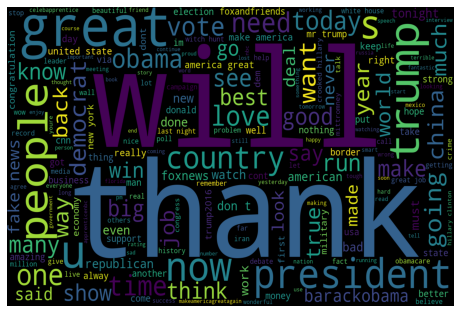

In [10]:
# Plot the Word Cloud
plt.style.use('seaborn')
allWords = ' '.join( [twts for twts in df['Tweet']])
wordcloud = WordCloud(width = 1500 , height = 900 ).generate(allWords)
plt.imshow(wordcloud , interpolation = None, aspect='auto')
plt.axis('off')
plt.show()

In [15]:
# Create a function to compute negative , nutral and positive analysis

def getAnalysis(score):
    if score < -0.5:
        return 'Extremely Negative'
    elif score < 0 :
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    elif score < 0.5:
        return 'Positive'
    else:
        return 'Extremely Positive'
    
df['Analysis'] = df['polarity'].apply(getAnalysis)



In [16]:
df.head()


Tweet  \
0                             be sure to tune in and watch on late night with david letterman as he presents the top ten list tonight   
1  donald trump will be appearing on the view tomorrow morning to discuss celebrity apprentice and his new book think like a champion   
2                                            donald trump reads top ten financial tips on late show with david letterman   very funny   
3                                                        new blog post celebrity apprentice finale and lessons learned along the way    
4                                            my persona will never be that of a wallflower  i d rather build walls than cling to them   

   subjectivity  polarity  Analysis  
0      0.497222  0.175000  Positive  
1      0.454545  0.136364  Positive  
2      0.420000  0.105000  Positive  
3      0.454545  0.136364  Positive  
4      0.000000  0.000000   Neutral

In [17]:
# Print all the extremely positive Tweets
j=1
sortedDF = df.sort_values(by=['polarity'])
for i in range(0, sortedDF.shape[0]):
    if (sortedDF['Analysis'][i]=='Extremely Positive'):
        print(str(j)+')'+sortedDF['Tweet'][i])
        j+=1

1)we win in our lives by having a champions view of each moment 
2)always know you could be on the precipice of something great 
3) if you dont have problems youre pretending or you dont run your own business   
4)heres to a safe and happy independence day for one and all  enjoy it
5)from ivanka and jared s wedding was spectacular and they make a beautiful couple i m a very proud father
6)work has begun ahead of schedule to build the greatest golf course in history trump international   scotland
7)wishing you and yours a very happy and bountiful thanksgiving
8)from wishing everyone a wonderful holiday  a happy healthy prosperous new year let s think like champions in 2010
9)celebrity apprentice returns to nbc sunday 314 911pm etpt outstanding list of celebrities  season should be the best one yet
10)trump tycoon app for iphone  ipod touch  its 299 but the advice is priceless 
11)superbowl sunday is a great american tradition the colts and saints are already champions but may the best t

2562)being good in business is the most fascinating kind of artmaking money is art  working is art  good business is the best art a warhol
2563)it was great being on  mikeandmike in the morning espn two great guys fantastic show
2564)now the un is attacking  redskins franchise  with all the worlds problems is this really a top priority
2565)just received a wonderful letter from a new father who bought his son his first book the art of the deal great parent
2566)if you cant say great things about yourself who do you think will  think like a champion
2567)ive been listening to  espngreeny   espngolic for yearsthe   interview today is an alltimer sensational
2568)  vicki cedeno   for president that would be so awesome nice
2569) success breeds success the best way to impress people is through results    think like a billionaire
2570)  robertfritz308   can u please wish me a happy birthday im a big fan thank you happy birthday
2571)  iamstevent stopped by my office to say hello a great guy

5068)  hashtag1usa i just watched d trumps interview on  cnn i get more impressed everytime i hear him speak    trump2016thanks
5069)  jaycatalyst1   univision execs are hypocritesthey dish out the most discrimination you should highlight that point
5070)  angeloftruth11   great interview with  donlemon thank you
5071)  cft1    great interview on  cnn  donlemon  cnntonight  makeamericagreatagain  trump2016  trump
5072)  timenout  cnn  donlemon congratulations don that was a great interview  
5073)  joycardinshow latest  mulawpoll finds  scottwalker at 37 percent approval   leading gop in  wisconsin
5074)  votedonaidtrump    renhowe  donlemon  cnn we love trump
5075)  tea4freedom pastor robert jeffres accurately gushes about    pastor jeffres is a great guy
5076)pictures of my beautiful mother amazing father and family hanging  monteskitchen in upstate new yorkpictwittercomlvx5sehqvv
5077)  misskellyaudrey  foxnews  howardkurtz  melaniatrump melania is a beautiful woman who conducts her

7375)the do nothing democrats have disgraced our great country jordanstatus1196158817408602113  
7376)i agree but in the end we will win and save our country from certain destruction  
7377)a great day for republicans a great day for our country
7378)true great job  repmiketurner  
7379)poll trump leads top 2020 democrats in wisconsin   
7380)thank you  elisestefanik and  stevescalise great jobpictwittercomk8qqbcaxbj
7381)adam schiff will be compelled to testify should the democrats decide despite the fact that my presidential conversations were totally appropriate perfect to go forward with the impeachment hoax polls have now turned very strongly against impeachment
7382)thank you kevin for the nice words  
7383)agnes your great boy ronald is looking down very proud of youpictwittercombhpu6iidan
7384) president trump is facing a process which is unprecedented for its unfairness  sam dewey
7385)great job heather  
7386)i will always protect our great warfighters i ve got your backs
738

In [18]:
# Print all the positive Tweets
j=1
sortedDF = df.sort_values(by=['polarity'])
for i in range(0, sortedDF.shape[0]):
    if (sortedDF['Analysis'][i]=='Positive'):
        print(str(j)+')'+sortedDF['Tweet'][i])
        j+=1
    

1)be sure to tune in and watch on late night with david letterman as he presents the top ten list tonight
2)donald trump will be appearing on the view tomorrow morning to discuss celebrity apprentice and his new book think like a champion
3)donald trump reads top ten financial tips on late show with david letterman   very funny
4)new blog post celebrity apprentice finale and lessons learned along the way 
5)listen to an interview with discussing his new book think like a champion 
6)don t be afraid of being unique  its like being afraid of your best self 
7)read a great interview with that appeared in the new york times magazine 
8)keep it fast short and direct  whatever it is 
9)your higher self is in direct opposition to your comfort zone 
10)check outs new igoogle showcase page 
11)thanks to all for your thoughtful birthday wishes  
12)re fb vanity urls sf chronicle  david beckham was one of the first along with britney spears  
13) wishing a happy fathers day to all the dads out th

3020)  chrislawgolf playing   international links tomoro cant wait supposed to be amazing  beentoldtotakealotofballs enjoy
3021)  ryelki    sstew3 we have no jobs no hope and no cash ten years ago we had some or all of those things interesting
3022)    sstew3 we need the art of the deal very true
3023)  ctobin22   if u were to suggest 1 most important thing to president obama would b leadership
3024)china controls north korea so now besides cyber hacking us all day they are using the norks to taunt us china is a major threat
3025) be up front and direct with people and they will return the favor    think like a billionaire
3026)always remember that as your success grows you will be asked for more favors learn how to say  no  it is critical
3027)remember to take time this weekend to relax and regroup it will pay major dividends for the next week
3028) faithable  danscavino true
3029) misterespinal thanks very nice
3030) truckncargirl  piersmorgan true
3031) lanah11  ivankatrump thanks
3

6019)   i live in chicago and love the sign i look at it everyday thanks
6020)  purkismark   i heard your interview on  howardstern i enjoyed every second of it  radiogold thanks
6021)   brought up a lot of good points on  sternshow this morning i really hope he runs for president
6022)  donniehoward2   im a democrat and id vote for you in a second thanks
6023)  tojo413 spent the night at the trump towerawesome best lookin building in chitown powerful lookin sign too  rahmemanuel
6024)  davidgordonjr tower in chicago is beautiful the name is the only sign of success theyve had in years jealousy for sure
6025)  dalstar009   needs to call into the  sternshow more often thanks
6026)  bkearnss haha gotta love listening to   on  sternshow  says exactly what hes thinking lol true thanks
6027)  davidginsburg once again   kills on the  sternshow trump  rqui ticket in 2016  thanks
6028)with our border not being secure obama is giving a pathway to terrorists to enter our country an attack is on 

9019)  lukedillon6 if   doesnt become the next president then that just shows how dumb america really is  trump nice thanks
9020)  mlssthot   i want our president to be smart and witty like you mr trump thanks
9021)  trump in 2016   does best imitation of himself  we got ourselves a winner ready to hang on for the long haul
9022)  joehos18 trump 96 success rate in business only 4 out of 100+ companies went south better than any other candidate better than all
9023)  mlssthot   ignore the losers and the haters you are going to make this country great again
9024)will be on  foxandfriends at 800 enjoy
9025)  mercedesschlapp thank you so much for your kind words on television  fantastic job and greatly appreciated
9026)trump s campaign hat becomes an ironic summer accessory  the new york times r=0  
9027)donald trump sends  fallontonight to highest friday rating in 18 months  jimmyfallon that is  huge  
9028)i truly understood the appeal of ron paul but his son  randpaul didnt get the righ

12018)  icegov hsi agents and ero officers on behalf of an entire nation thank you for what you are doing 247365 to keep fellow american s safe everyone is so grateful  lawenforcementappreciationday president    
12019)the single greatest witch hunt in american history continues there was no collusion everybody including the dems knows there was no collusion  yet on and on it goes russia  the world is laughing at the stupidity they are witnessing republicans should finally take control
12020)cutting taxes and simplifying regulations makes america the place to invest great news as toyota and mazda announce they are bringing 4000 jobs and investing 16 billion in alabama helping to further grow our economypictwittercomkcg8ivh6ia
12021)good news toyota and mazda announce giant new huntsville alabama plant which will produce over 300000 cars and suv s a year and employ 4000 people companies are coming back to the us in a very big way congratulations alabama
12022)small business poll has hig

15018)never be allowed to roll into a winter showtrial indeed allowing a long drawn out trial in the senate would merely validate and perpetuate the fraud begun in the house the crisis is of the democrats own making and it s up to republicans to make sure this never happens
15019)china and the usa are working on selecting a new site for signing of phase one of trade agreement about 60 of total deal after apec in chile was canceled do to unrelated circumstances the new location will be announced soon president xi and president trump will do signing
15020)our manufacturers we should have lower interest rates than germany japan and all others we are now by far the biggest and strongest country but the fed puts us at a competitive disadvantage china is not our problem the federal reserve is we will win anyway
15021)the home of nancy pelosi i can t believe her voters can be happy with the job she and the do nothing democrats are doing san francisco has really gone down hill so sad  
15022)1

In [19]:
# Print all the neutral Tweets
j=1
sortedDF = df.sort_values(by=['polarity'],ascending = False)
for i in range(0, sortedDF.shape[0]):
    if (sortedDF['Analysis'][i]=='Neutral'):
        print(str(j)+')'+sortedDF['Tweet'][i])
        j+=1

1)my persona will never be that of a wallflower  i d rather build walls than cling to them
2)miss usa tara conner will not be fired  ive always been a believer in second chances says
3)strive for wholeness and keep your sense of wonder intact 
4)enter the think like a champion signed book and keychain contest 
5)when the achiever achieves its not a plateau it s a beginning 
6)dont forget to enter the think like a champion signed book and keychain contest 
7)did you know is on facebook   become a fan today
8)read an excerpt from think like a champion by 
9)you have to know when to call it quits and when to keep moving forward 
10)last week to enter the think like a champion signed book and keychain contest 
11)today iss birthday send him your bday wishes here 
12) expand your life every day   
13)donald trump backs apprentice randal pinkett for nj lieutenant governor 
14)congrats to winners from around the world who entered the think like a champion signed bookkeychain contest 
15)check

268)my  foxnews interview last night with  gretawire
269)when will washington stand up to china china is manipulating its currency and stealing our jobs washington should move on legislation
270)my interview from last night with  piersmorgan discussing ows
271)bernie madoff and tony la russa in todays  trumpvlog 
272)is jon stewart a racist see video   thedailyshow
273)is jon stewart a racist see video that includes clip  3fj7qk  thedailyshow
274)the  supercommittee must cut spending not raise taxes washington has a spending problem not a revenue problem
275)the economy wont fully recover until  obamacare is fully repealed it is a job killer
276)watch my interview with greta van susteren  gretawire tonight on fox news at 10 pm
277)my interview on  gretawire discussing the economy and  thehermancain witch hunt
278)malfeasance at fannie mae and freddie mac helped cause our current financial meltdown
279)see what i have to say about the occupy wall street protestors in todays  trumpvlog 


648) sweepstweet  clayaiken might get some use out of the chi touch digital hairdryer not the same for  arsenioofficial
649) celebrityapprentice listening to the advice from  johnrich and  marleematlin adds another insight into the final 4  sweepstweet
650)tomorrow is  trumptuesday on  730 am dont miss it
651)my  foxandfriends interview discussing the 911 trials at gitmo  mittromney the job numbers and  celebapprentice
652)still a buyers market home prices are dropping mortgages are low now is the time to take advantage for your gain
653)vpreally 
654)entrepreneurs must have vision plus the power of focus to see the future and turn their vision into a profitable reality  midastouch
655)2011  celebrityapprentice winner  johnrich and  marleematlin interviewed the final four in this weeks episode 
656)my son don will be giving the keynote address at the investment show in sandton south africa on dec 1 hes an cont 
657)my  squawkcnbc interview discussing the republic of georgia taxes the f

1067)all these polls released by news outlets are oversampling democrats they want to influence public perception of the race
1068)with obama and bernanke destroying the value of the dollar gold and real estate should continue to rise in value
1069) mittromney i am running for president to get us creating wealth againnot to redistribute it
1070)scaryobamas budget deficits are so out of control that he has to borrow 40 cents on every dollar he spends
1071)the debates are going to have a big impact on the election  mittromney has provedin floridahe delivers under pressure
1072)home values have sunk a record 15 under obama
1073)coincidence obama and ahmadinejad each describe  israels warning over the iranian nuclear program as just noise 
1074)trump to liberty u students the world is laughing at us  via  media
1075)did a shoot in front of the metropolitian museum on 5th ave for the 13th season of the apprentice
1076)yet not one meeting with an ally or an enemy wheres the media
1077)obama 

1496) and in my opinion should not be doing the apprentice
1497) to do the apprentice but i approved you anyway without my show you d be nothing
1498) lord sugar  piersmorgan sugar if you taught piers morgan he never would have won
1499)instead of biting the hand that feeds you don t bother just keep making me money
1500) piersmorgan  lord sugar no his ignorance
1501) realpro4real thank you
1502)  lord sugarbut you wouldn t notice because you have no vision and you are a total loser
1503)dopey sugar  lord sugar the wind turbines are ruining the beauty  majesty of scotland
1504)  lord sugar you need the income from the show to keep goinghope it doesnt hurt
1505)via  digitalspyus to lord sugar drop to your knees and thank me
1506)quote of the day decrees boycott on glenfiddich scotch  via  zagat
1507)dopey sugar  lord sugar you cant carry  piersmorgans jock
1508)dopey sugar  lord sugar you should thank me for having created the platform on which you became knownthe apprentice say thank y

1646) cjohnson623  billmaher stay tuned
1647) dalasner stay tuned
1648)watch eric at 9 am est today on fox 5 w  rosannascotto and david price to discuss eric trump foundations 20 million donation to st jude
1649) keep fighting frank never give up
1650) seems like it
1651) no
1652) easier said than done
1653)  billmaher was so nervous talking about me on the  jayleno show i ve never seen him like that
1654) nicolewalker20 i have and i do
1655)lawyers have sent  billmaher demand notice and necessary documentation
1656)i have accepted  billmaher s 5 million offer paid to me for charity made on the  jayleno show
1657)the charities i have designated for  billmahers donations are police athletic leaguenew york march of dimes hurricane sandy victims
1658) the opposite
1659) homeswestfield  erictrump  myfoxny  rosannascotto  stjude thank you
1660) bradymagic  erictrump thank you
1661)experience is the teacher of all things  julius caesar
1662) rhondaberment thank you
1663)my  eonline interview

1969) goofyname march 3rd 9 pm est on nbc
1970) hi evelina
1971)congrats  trumptoronto for being ranked 1 on  tripadvisor and a travellers choice 2013 winner
1972)my  marklevinshow interview discussing obamas sotu roves attack on the tea party  allstar  apprenticenbc 
1973)via  breitbartnews   biggovt  war trump levin pummel rove as conservative battle escalates 
1974)via  bw vows to fight scottish wind farm plan in courts 
1975) trump rove gave us obama   via  cnsnews
1976)if us air and american airlines are allowed to merge we are back to the days of  monopoly 
1977) jason23 9  deesnider  apprenticenbc march 3rd 9 pm est on nbc
1978) kaybee0h  acnnews and i look forward to itbig crowd
1979)in my office with banana joe who just won the  wkcdogs at  msgnyc 
1980) eawiii  melaniatrump thank you edward
1981) johnssaba it will be greatthanks
1982) microger youre rightbillions
1983)remember if you dont promote yourself then no one else will likewise believe in yourselfor no one else will e

2145)bret had a target on his back from the get go
2146)will plan b miss trace
2147)my 757 is incrediblei think the teams agree on that
2148)which team do you think has the edge in this interactive photo experience task assignment
2149)gary as the cat in the hat he can work it out
2150)what latoya is saying omarosa is one of the nicest people shes met
2151)re my hairshould i change it what do you think
2152)the losing team is now back in boardroom i cant discuss the team members or whats going on or what happens from here on out
2153)let us never negotiate out of fear but let us never fear to negotiate john f kennedy inaugural address january 1961
2154)my  foxandfriends int re tiger s victory at trump  doralresort s  cadillacchamp my wh tour offer and cpac
2155)via  parademagazine  on his dream job and allstar celebrity apprentice    apprenticenbc
2156)if you have built castles in the air your work need not be lost that is where they should be now put the foundations under them thoreau

2357)  jerrylawler was terrific  wwehof 
2358)watching the show  wwehof 
2359)making my speech  wwehof 
2360)another one of me on stage  wwehof 
2361)family group shot  wwehof 
2362)watching  trishstratuscom get inducted from the sold out crowd  wwehof 
2363)here i am with  trishstratuscom  wwehof 
2364)fellow inductee  sammartinobruno and me  wwehof 
2365)  princewatercres  vincemcmahon inducts   huh cant picture anyone else doing this  wwehof
2366)talking with  sammartinobruno backstage   wwehof
2367)class of 2013  wwehof  
2368)with fellow inductees in front of the sold out crowd at msg  wwehof 
2369) thefarfar
2370) virginiadg  bjjsoulroller
2371) stephenhcornell
2372) emmyb96  theellenshow
2373) brian legit
2374) riggs deb
2375)  davidgrieve   what s with the ridiculously short apprentice episodes   apprenticenbc going back to two hours  ratings
2376)  mersjm1   why did you get this tattoo   i never got a tattoo and never would
2377)my  hollywoodlife interview w  melaniatrump disc

2644) dannyzuker come on danny are u afraid of the deal be careful im really good at deals
2645) dannyzuker i hope you pick up a lot of twitter followers by this so people can see what a total asshole you are
2646) thanks country is in trouble
2647)  sirenasola   the pres needs some helpcan you teach him the words youre fired
2648)the lawyer i just beat in chicago was a buffoon but was a lot smarter and sharper than  dannyzuker come on danny make the bet
2649) beans51   who is  dannyzuker  actually a nobody
2650) rustinniles just killing time
2651) bvogel56 i never went bankrupt  just like buffett icahn kravis and paulson  as you know
2652)  koneslager   during your inaugural address tell obama youre fired stranger things have happened
2653)   do you have the guts to debate jon stewart he would never do it he couldnt use his writers
2654)  raybongz   it should be mandatory that all haters and losers use their real name or identification say it again
2655)  sirenasola   the pres needs s

2816)  2ndnatureshh   what are your thoughts on this  paula deen drama paula has to stop apologizing and get back to work
2817) carlosgerboles wrong made a lot of money in atlantic cityand most kids do blow their inheritance or do nothing with itlook at stats
2818)i am going to trump national doral in miami this week to check out the 250 million renovation in construction always watch the money
2819)  edandbev   when do you expect the course to be finished november
2820)  djgura    10bb forbes has you at 3bb what gives they know nothing about me or my numbers
2821)  davidrhythmguit    mark cuban accepts the fact that the president of the united states was born here doubt it
2822)  edm   head    edandbev my question is did mlk jr use the n word no only paula dean used it
2823) kenzig thank you
2824)every penny of the 7 billion going to africa as per obama will be stolen  corruption is rampant
2825)fox andfriends now
2826)via  reason i can fix america
2827)millions protesting in egypt fo

3129)  joesantos5150   wipe the floor with him mr trump 
3130) trump university liberal witch hunt i hope they loseand get counter sued  
3131) nikkio thank you
3132)why is it that eric schneiderman is considered a lightweight by so many and has failed to go after jon corzine and big abusers for billions
3133)why did lightweight ag eric schneiderman come to my office on numerous occasions begging for campaign contributions also recent asks
3134)  robertlbuchsr   mrtrump i just wanted u 2 know i agree w urespect you 2thanks
3135)  bahia6085    lawsuit against trump university is without a doubt political
3136)fox and friends
3137) michaelpmulhall  cnbc i dont think he can
3138) elmarosuelvin thank you
3139)thug politics lightweight hack schneiderman meets with obama on thursday then brings frivolous suit on saturday
3140)see schneiderman admit he spoke with obama about  ongoing investigations
3141) d murphy13    purely a political move if he met wobamamrtrump please put the heat on this

3433)breaking news  the washington redskins have just announced that they will be removing the name washington from their name
3434)where s the accountability for the 635m website fiasco in the obama administration heads should roll and officials should be fired
3435) danamira apology accepted
3436)courage is being scared to death and saddling up anyway  john wayne
3437)jeffrey lord  amspec thank you for the presentation terrific job
3438) you want to compete and you want to compete at the highest level    boonepickens
3439)the audacity of ineptitude   obamacare website will cost over 1b  when will someone finally be held accountable
3440)  thegurleygirl   wish you could lead this country we need you mr trump
3441)    gwrepublicans want to help campaign for trump 2016 thank you
3442) tuscchevy   trump 2016  all for it
3443)  dimas720   kick ass in 2016 im on board mr trump
3444)  iamtoneantone   2016 is your year and i will do everything god gave me to show my appreciation  iamtoneanto

3641)entrepreneurs apply your skills and talent but above all be tenacious see yourself as victoriouswhich means never giving up
3642)i could fix existing tappan zee bridge for peanuts unfortunately gov cuomo will end up spending more than 10b on this project 25 tolls
3643) push yourself again and again dont give an inch until the final buzzer sounds   larry bird
3644)without passion you dont have energy and without energy you dont have anything
3645) tbt with barbara walters on my helicopter going somewhere 
3646)will be working with contractors at trump national doral in miami today
3647)  alefx33 nelson mandela and   two worlds leaders pictwittercomcbgqodlvnw
3648)cover your basesknow everything you can about what youre doing keep your focus by being well informed on a daily basis
3649) no one remembers who came in second   walter hagen
3650)what the hell is going on with global warming the planet is freezing the ice is building and the gw scientists are stucka total con job
3651)th

3851)  alexsalmond wind turbines are ripping your country apart and killing tourismelectric bills in scotland are skyrocketingstop the madness
3852)  b2tac   they also kill thousands of birds here in ca  alexsalmond
3853)  chris lapenta   thats why we need you in 2016
3854)looks like plane may have been found in the indian ocean off the coast of australia
3855)while putin is scheming and beaming on how to take over the world president obama is watching march madness basketball
3856)continuous effort  not strength or intelligence  is the key to unlocking our potential  winston churchill
3857)i believe putin will continue to rebuild the russian empire he has zero respect for obama or the us
3858)you miss 100 of the shots you dont take  wayne gretzky
3859)if youre going through hell keep going  winston churchill
3860)i will be on the record with greta van susteren  gretawire tonight at 7 pm easternfox news channel
3861)  gmo7 finally theyre filming the celebrity apprentice cant wait for t

4132)  magnumcj   told the truth all day about pinehurst 2 it is just not a good looking us open course so true
4133)  pineworst 2 is a number two alright a dump turn on the water since when r the carolinas in drought
4134)  jeniferstevens awful look to itnot like trump in palm beach and briarcliff or scotland that ive played your courses are the best
4135) if hilary clinton runs for office   has too or im moving to canada
4136)will be doing fox  friends at 7  2 minutes
4137)  odonnelltw   pinehurst 2 is what happens when environmentalists take over the usga
4138)virginias highest rated wine by  wineenthusiast  trumpwinery is inspired by the regions of bordeaux  champagne 
4139)congratulations to  spurs on their  nba championship welldeserved
4140)  backontrackusa remember the terrorists that obama has been arming in syria against assad well now they are marching on bagdad
4141)  deehogan21   along with  doonbeglodge heaven on earth
4142)  dondraper ny   gotham  conradhiltonny  rachelm

4261) let your passion for your work carry you through all the setbacks they can throw at you    trump never give up
4262) you have to keep going and moving forward no matter what is happening around you or to you    think like a champion
4263)  backontrackusawe should be placing tariffs on mexican goods coming into this country to reimburse the american taxpayersecure the border
4264)  jeff smith7   maybe perry can put in a 9 hole golf course on the banks of the rio grande to lure obama to see the border
4265)  thenicksutton  theviewtv hearing rosies name makes me nauseous seeing her face makes me puke cant imagine watching her
4266)my  ingrahamangle interview on the border crisis usmc tahmooressi  my fight for the american flag  1500 mark
4267)my  breitbartnews   biggovt editorial  a country that cannot protect its borders will not last 
4268)  aguscaloevery time that somebody ask me about my future i always say i want to be like youre such an inspirationthanks
4269)  jurciuoli19   h

4636)  rainedevries    rramz1979 this  dallas girl would vote for you thank you
4637) if   doesnt run we are screwed  trump2016
4638)  krismichaelboy if   ran for president issues in the united states could be resolved he has my vote  trump2016
4639)    amen run mr trump i will vote for you
4640)  ericleebow   will vote for you if you run
4641) if   runs for office he has my vote
4642)  sinnon7 see inside  s five star scottish hotel  via  travelmail words by  sinnon7
4643)  oforsyth   im from the uk and even im voting for trump trump im moving to america
4644)here we go  a healthcare worker who treated thomas duncan the man who flew into the us from west africa infected with ebola caught it
4645)  ihunt88 i think its about time   stands up and announces hes running for president
4646)    ihunt88 yes please do we need somebody with a head on their shoulders  knows how to use it
4647)  bettylovesdogs    ihunt88 never gonna happenid like it too but he wont run keep watching
4648)i will be

4753)  bohanmewbohan  seanhannity   i would vote for  trump for  president any year
4754)  michelledivv for president  
4755)  b thornton66 if you were to run for president youd have my vote youre what this country needs  trumpforpresident  trump2016
4756)  libertyladyusa i agree with mitt should not run again  hannity
4757)   no he shouldnt but should  trump4potus
4758)  steeldestroyer   i agree with u i was going to vote for u and i still am
4759)the us rocket that blewup and crashed yesterday is emblematic of the united states under obama nothing works be it a rocket or website
4760)via  hpcatravel by  alau2  trump hotel reflects youthful luxurious vancouver ivanka trump  n 6065534htmlutm hp ref=canadatravelir=canada+travel  
4761) mitt romney blew it shouldnt run again     via  media by  owentew
4762)obama will quarantine all soldiers returning from africa for 21 days but he still allows all who contract ebola into country hypocrite
4763)entrepreneurs look at the solution not the p

5138)in charlottesville va  trumpwinery is virginia s largest winery with 200 acres of french vinifera varieties 
5139)via  media by  owentew  last thing we need is another bush   
5140)  marleykush   vote for president  
5141)  teeroyd   you told america what needs to happen with china trade jobs ectso you need to run  2016
5142)  eileenjael    carrienguns do you think the bushes knew justice roberts was going to pull an obamacare stunt like that
5143)  dxdelafu   the last thing this country needs is another bush or another clinton
5144)    carrienguns america cannot survive another bush  nomorebush
5145)  earlallencarr   thats why we need and want you to run for president
5146)  jeremywinder we need   in office guide this country back to its roots
5147)congratulations  for making  cntravelers  goldlist2015 
5148)we fully support  saveculzean in turnberrygreat for beauty  tourism wind turbines are death to environment 
5149)ill be cohosting  extratv tonight be sure to tune in
5150)wil

5296)  mariadomenique9  apprenticenbc  todayshow    realgilbert  geraldorivera cant wait to watch tonight
5297)  cinna33  mrsilverscott  celebapprentice    jskibler yeah bring ondown the gauntlet
5298)  nicoleamarin i cant wait to watch this season of  celebrityapprentice  donaldjtrumpjr i cant wait to watch  brandiglanville dominate
5299) celebapprentice  apprenticenbc returns tonight at 98c on nbc   
5300)  mlratchford  apprenticenbc   rooting for  realgilbert  teamgilbert
5301)  fabiolasellsnj  donaldjtrumpjr    apprenticenbc looking forward to this
5302) here we go  apprenticenbc starts now on  nbc lets do this    ivankatrump  celebapprentice
5303)  bucherbrandon watching   s show  celebapprentice to see  brandiglanville
5304)  michaelsdevine i kinda hope  realgilbert sticks around for a while just for moments like that  celebapprentice  apprenticenbc
5305)  gaga in fla  andreatantaros  foxnews  geraldorivera   well not that it matters i think geraldo is a sanctimonious ass
5306)  

5637)  johnnydamon is  apprenticenbc so   please dont fire him  ivankatrump    damonknowswinning
5638)  keatsben   hello mr president im a big fan of your work mate and the show    celebrityapprentice
5639)  njmusicfun  govchristie watching   on  celebrityapprentice
5640)  therightnewz video   to  greta  jeb wont beat hillary clinton
5641)  one4eternity      balkesgirl    apprenticenbc this show rocks
5642)  bravolebrity1    geraldorivera is like that bunny that keeps on ticking just waiting for him to explode  celebapprentice
5643)  natalieardyss  kenyamoore dont get on  msvivicafox nerves you just join the team  celebapprentice   kenya a troublemaker
5644)  gamiliell  mrsowaters54  msvivicafox    theapprentice9 i think ms fox outclasses both of them  justamatteroftime 
5645)  buckybirt     celebrityapprentice has caused me to like brandi
5646)  antoknee71    omarosa of this season kenya
5647)  apprenticenbc by the way   you will not want to miss  phonegate next week on  celebapprenti

5831)the  huffingtonpost is a total joke  laughing stock of journalism as is gross arianna huffington they don t report the facts
5832)trump national golf club los angeles is situated on the palos verdes peninsula overlooking the pacific ocean  clubslos angeleslos angelesasp  
5833)  trump4pressie hi   save gods nation and run for president in 2016  trump2016  noobama
5834)so many people are angry at my comments on mexico but face it mexico is totally ripping off the us our politicians are dummies
5835)via  dmregister by  jenniferjjacobs  trump hires iowan with knack for shoestring campaigns   
5836)via  unionleader by  tuohy trump hires lewandowski as presidential run eyed     fitn  makeamericagreatagain
5837) tbt with the cast of goodfellas   
5838)interview wmelanie batley via newsmax  
5839)via  time by  lullintheaction   realtime weighs a 2016 run at  cpac2015  
5840)via  cbsnews by  reenajf scolds republicans toughen up  
5841)via  washingtonpost by  jdelreal about that speech at

6136)via  reuters takes steps toward 2016 presidential run  
6137) tbt trump and gekko 
6138) update trump plans public event at  wartburgcollege   09cb7701f4e75742b8f5e205e29ebf51html   via  wcfcourier
6139)via  businessinsider by  hunterw  trump im going to surprise a lot of people in 2016   
6140)via  walidshoebat  watch he is patriotic and he can fix america   
6141)america will never be destroyed from the outsideif we falter and lose our freedomsit will be because we destroyed ourselves a lincoln
6142)jeb bush   i am a conservative  = barack obama  if you like your healthcare plan you can keep your plan 
6143)  l3nny85 perhaps its time we bring back the  american  empire  mista trump    makeamericagreatagain
6144)  joequinn6   america needs your leadership please run for president pictwittercomhnkdb76nh7
6145)  jetranger69   donaldjtrump    makeamericagreatagain
6146) chadss    trump2016
6147)  paloeza   america needs you  trumpforpresident
6148)  bridgetmarie89 out of all the pol

6365)marco rubio had no idea what he was doing on chris wallace show said iraq was not a mistake he looked clueless
6366)via david ebner re stanley cup  trump poster  if you re going to be thinking anything you might as well think big   
6367)  g87mac   pinnacle of chicago skyline  trump pictwittercomxzuw5dcthp
6368)  pdigiore1   my husband and myself are praying you run for president thank you
6369)  littlevd23  oreillyfactor donaldtrump if mr trump runs and becomes the next president you can rest assure he would address them swiftly
6370)  pepsidaisy    trump2016  trumpforpresident  
6371)  markmizzousteel i see you    
6372)      pepsidaisy    trump2016  trumpforpresident  
6373)remember when jeb gave hillary a medal on the 1 year anniversary of benghazi    guess he would have invaded libya too
6374) trump i created tens of thousands of jobs     via  thehill by  smilotweets
6375)via  huffpostpol by   under current  will end outsourcing if president  b 7307426html  
6376)tpp does not

6635)via  by  says he is no apprentice when it comes to israel  
6636)speaking at the city club of chicago sold out in minutes with thousands on the wait list  
6637)statement on relationship with nbc 
6638)  ghostofnicky  outfrontcnn  cnn   donald is the only candidate that speaks the truth
6639)  jacobmathews    jamalwms45  howardkurtz  johnnydollar01  megynkelly i like donald for his no fear tell the truth attitude
6640)  kristywillams79   ive waited years for you to run for president you are going to fix america we need a businessman
6641)    slucch24  anncoulter it is so blatantly obvious why do people refuse to see it
6642)  c archaeology   is our only hope  littlebytesnews  tcot
6643)  kingjersey1    makeamericagreatagain they cant stand that you are speaking for the american people
6644)  wildmanbs it says a lot about  nbc when they fire   but keep brian williams and  thereval on the payroll  tcot
6645)thank you ted  
6646)  figlo7   apologize to the press for not being a polit

6858)when will anyone be held accountable for the va scandal the politicians are experts in never facing any consequence
6859)arriving to check out the border 
6860)  danscavino via economistyougov 7 24 2015  makeamericagreatagain  trump2016pictwittercomgsxf8tfzvn
6861)  kimbredesen   i appreciate that you dont apologize when someone is offended by what you say  makeamericagreatagain
6862)thank you  dennisrodman its time to  makeamericagreatagain i hope you are doing well  
6863)via  breitbartnews by  noltenc surges to commanding lead in postmccain backlash poll  
6864)  mykalfury  seanhannity   i hear same doubters as i heard when reagan ran against carter press said hed lose reagan won
6865)  operator1975   please mr trump keep the pressure on and bring change to this country
6866)  garethbale22   youre going to turn america around donald i can feel it
6867)  stonezipper  stephenfhayes if he stops running for president hes not what we the people think he is will never happen
6868)   

7134) us   mnmans polling convergence  oangravis and reuters    cnn  hbo  usstatus650126273033797632photo1pictwittercomzzkm8wuyqy 
7135)  valerieannt  drudge repo jebbush jeb you are falling in polls because conservatives feel that you cannot  makeamericagreatagain
7136)  mormontim going to see   tomorrow in franklin tn  makeamericagreatagain
7137) cant wait for   to be the next pres  cnn  foxnews  drudge repo blackrepublican  
7138)  jwbananastand  nbcsnl i think i just heard  s ratings go up another 5  trump  snl
7139)  leftfootjustice if   becomes  potus we will finally have a  wwe hall of famer as president
7140)  piercingshawn   please dont roll over  you are this countrys last hope and our kids need you dont lose this deal 
7141)  topcota1sg  phxken i am hispanic and will vote for  
7142)  billpwr1   cnn  foxnews  drudge repo blackrepublican fyi  batchelorshow  larry kudlow  trump2016 appeal grows
7143)will be interviewed on  foxandfriends at 830
7144)  misterdish69  iamfreedomma

7317)my interview on  thisweekabc with  gstephanopoulos had a 40+ ratings increase over same sunday last year 20 over last week
7318)  giatny rubio an oratorliar like obama but totally unqualified rubio visa bill did not protect american workers see disney
7319)donald trump leads polls in florida   
7320)  smithsj1   mr trump do you swear to provide for protect and care for our soldiers including vets yes yes yes
7321)      republican is 28 support for carson is 23 poll used by  megynkelly last month
7322)  jackdix03868724 arizona polls for democrats only say they would prefer over hillary clinton 60
7323)  anonymousyndica i think obama  hates israel   
7324)when candidate john kasich on the  oreillyfactor talked about dismantling medicare and medicaid he was referring to ben carson
7325)i see marco rubio just landed another billionaire to give big money to his superpac which are total scams marco must address him as sir
7326)  marshallfsmith  lexingtonbobby   and its a glorious fall d

7516)  xgnraging   i hope you become president
7517)thank you for the support south carolina  ussyorktown  makeamericagreatagain  trump2016pictwittercomn0ph35qskv
7518)  ray aub  nytimes  cnn people forget the policies of leaders like  jebbush allowed 911 killers to immigrate drive  pilot planes
7519)thank you piers they dont know what theyre getting into  
7520)thank you  jebbush you finally get it  fn2l3ghzi
7521)carter banned iranians from coming to us during hostage crisis   
7522)thank you for all of your support south carolina  trump2016pictwittercomjwfe5tdg50
7523)  donlemon on  cnn at 1000 pm
7524)why does  cnn bore their audience with people like  secupp a totally biased loser who doesnt have a clue i hear she will soon be gone
7525)  quinnlisaq  cnn  donlemon  the people do not care what politician said about trump  we still support him all the way
7526)i have decided to postpone my trip to israel and to schedule my meeting with  netanyahu at a later date after i become presi

7763) iacaucus  caucusfortrump  icaucused  ivoted otk1frbnr8feature=youtube  
7764)  bobvanderplaats asked me to do an event the people holding the event called me to say he wanted 100000 for himselfphony  foxandfriends
7765)i will be going to church in iowa this morning with my wife melania after church i will be making two speeches and touring the state
7766)  donaldjtrumpjr  his wife  mrsvanessatrump attended the  snowflakegardenbrunch here w governor  terrybranstadpictwittercommglh9im9qi
7767)join us  caucusfortrump 11am waterloo    130pm ceder rapids   pictwittercomyyjq1ift2x
7768)  stephbewitching   all you haters need to realize trump got the second highest vote in history and hes never held office
7769)during primetime of the iowa caucus cruz put out a release that  realbencarson was quitting the race and to caucus or vote for cruz
7770)this was sent out from ted cruz as iowans arrived at their caucus sites to vote  cruzfraudpictwittercomtrm7kucrsu
7771)cruz just lied again i a

8087)lyin ted cruz cant get votes i am millions ahead of him so he has to get his delegates from the republican bosses it wont work
8088)thank you california will see you soon  makeamericagreatagain   pictwittercom5rk1u4dq7r
8089)  diamondandsilk    is who we need 2 fix this corrupted rigged system 4 no profit under budget  ahead of schedule
8090) makeamericagreatagain  nyprimary   
8091)thank you buffalo  nyprimary  pictwittercom4ujduovlpj
8092)thank you eric  
8093)join me in indianapolis indiana tomorrow at 3pm  trump2016  makeamericagreatagain tickets   pictwittercomjbnytk3fye
8094)lets go america time to take back our country and  makeamericagreatagain watch video  go  votetrump   
8095) makeamericagreatagain  trump2016   
8096)who did the house task force on urgent fiscal issues call when america needed help  
8097)1988 with oprah discussing why i would never rule out a run for  potus  trump2016  votetrumpny  primaryday  
8098)discussing  newyorkvalues in buffalo last night on th

8298)on immigration i m consulting with our immigration officers  our wageearners hillary clinton is consulting with wall street
8299)statement regarding british referendum on eu membership   
8300)  jolena3   and we will get it back once we have president trump cant wait
8301)thank you to everyone who came out  joined us  trumpturnberry yesterday  erictrump  ivankatrump  donaldjtrumpjrpictwittercomhq1jtmrutg
8302)we must suspend immigration from regions linked with terrorism until a proven vetting method is in place
8303)obama has blocked ice officers and bp from doing their jobs that ends when i am president
8304)  arnold ziffel  anncoulter also cant help but notice the stock markets reaction as   was speaking  upupup
8305)  bluedogdemky  cwaunion  iowa trump  richardtrumka  aflcio this is why i would think the unions would support   for  potus
8306)check it out  2nd video on lying crooked hillary is now online watch it here     crookedhillary  trump2016
8307)the story with hillary w

8532) laborday  americafirst video   pictwittercomzqrtbv4kri
8533)thank you american legion post 610 for hosting  mike pence  i for a roundtable with labor leaders  laborday  magapictwittercomr0cwjlv38l
8534)thank you ohio  americafirstpictwittercomp68gajdhwu
8535)thank you  americafirstpictwittercom6v4c8ykdvl
8536)mainstream media never covered hillary s massive  hacking  or coughing attack yet it is 1 trending what s up
8537)thank you  votetrump  imwithyoupictwittercomsceq9lqttj
8538)join me in pensacola florida this friday at 7pm  votetrump   pictwittercom0cidcuofeo
8539)thank you north carolina get out   votetrump on 1182016  makeamericagreatagainpictwittercomhx2lrys4vq
8540) americafirstpictwittercomfqgxwajxd7
8541)coming up  genflynn  newtgingrich on  foxandfriends
8542)last nights results  in poll taken by nbc  americafirst  imwithyoupictwittercomsconny1fl3
8543)final poll results from nbc on last nights commanderinchief forum thank you  imwithyou  magapictwittercomc5ipaxun7b
85

8801)i delivered a speech in charlotte north carolina yesterday i appreciate all of the feedback  support lets  maga   pictwittercomobj1b6zqdp
8802)  keithrowland people in arizona just got a taste of obamacare with a 116 increase in premiums   repeal and replace
8803)crooked hillary launched her political career by letting terrorists off the hook  draintheswamp   pictwittercomvasn25cdbk
8804)join  teamtrump on facebook  watch tonights rally from geneva ohio our 3rd rally of the day  americafirst  maga 
8805)thank you geneva ohio if i am elected president i am going to keep radical islamic terrorists out of our country  makeamericasafeagainpictwittercomlj3mordego
8806)join me tonight in cedar rapids iowa at 7pm    phoenix arizona tomorrow night at 3pm   
8807)just landed in iowa  speaking soon
8808)i am in colorado  big day planned  but nothing can be as big as yesterday
8809)tomorrow las vegas nv 11a    greeley co 4p    albuquerque nm 7p   
8810) obamacarefailpictwittercomiusxk4n9w7
8

9090)it is time to rebuild our country to bring back our jobs to restore our dreams  yes to put  americafirst ty ohio  infrastructureweekpictwittercom4hghviyqor
9091)time to start building in our country with american workers  with american iron aluminum  steel it is time to put  americafirstpictwittercomr997qhxvx3
9092)america is going to build again under budget and ahead of schedule time to put  americafirst  infrastructureweek  pictwittercomgfzfxgmyhu
9093)the democrats have no message not on economics not on taxes not on jobs not on failing  obamacare they are only obstructionists
9094)ivanka on  foxandfriends now
9095)just arrived in wisconsin to discuss jobs jobs jobs  magapictwittercomlej9s817yb
9096)why is that hillary clintons family and dems dealings with russia are not looked at but my nondealings are
9097)crooked h destroyed phones w hammer bleached emails  had husband meet wag days before she was cleared  they talk about obstruction
9098) congressionalbaseballgamepictwitt

9196)just arrived at camp david where i am monitoring the path and doings of hurricane harvey as it strengthens to a class 3 125 mph winds
9197)we will remain fully engaged w open lines of communication as  hurricaneharvey makes landfall america is w you  govabbott  fema  dhsgovpictwittercompryiqrxglr
9198)i will be going to texas as soon as that trip can be made without causing disruption the focus must be life and safety
9199)with mexico being one of the highest crime nations in the world we must have the wall mexico will pay for it through reimbursementother
9200)going to a cabinet meeting teleconference at 1100 am on  harvey even experts have said theyve never seen one like this
9201)leaving now for texas
9202)the us has been talking to north korea and paying them extortion money for 25 years talking is not the answer
9203)president proclaims september 3 2017 as a national day of prayer  hurricaneharvey  prayfortexas  pictwittercommplb7wpxft
9204)stock market up 5 months in a row
9

9357)it was my honor thank you  
9358)to each member of the graduating class from the national academy at quantico congratulationspictwittercombgt8s33zlu
9359)you are always there for us   the men and women in blue thank you to our police thank you to our sheriffs and thank you to our law enforcement families god bless you all and god bless america  lesmpictwittercom9ejiddvl9h
9360)dow sp 500 and nasdaq close at record highs  magapictwittercomhvqwnqsgug
9361)weekly addresspictwittercom1sh20hb33x
9362)ivanka trump will be interviewed on  foxandfriends
9363)thank you maria b  
9364)together our task is to strengthen our families to build up our communities to serve our citizens and to celebrate american greatness as a shining example to the worldpictwittercomds6tzlgjpa
9365)we are delivering historic tax relief for the american people  taxcutsandjobsactpictwittercomllgatrch5o
9366)merry christmaspictwittercomxa2qxcisvv
9367)merry christmaspictwittercommytv5gndll
9368) arrests of ms13 mem

9483)big supreme court ruling for baker just out
9484)meeting in singapore with north korea will hopefully be the start of something bigwe will soon see
9485)the historic rescissions package we ve proposed would cut 15000000000 in wasteful spending we are getting our government back on track
9486)pictwittercom4ojdqtmeix
9487)looking forward to seeing my friend prime minister  abeshinzo of japan at noon will be discussing north korea and trade
9488)when will people start saying  thank you mr president for firing james comey 
9489) total jobless claims running at lowest level in 44 years   
9490) 3 billion payoff 101 utilities cut rates credit gop tax cuts   
9491)please tell prime minister trudeau and president macron that they are charging the us massive tariffs and create nonmonetary barriers the eu trade surplus with the us is 151 billion and canada keeps our farmers and others out look forward to seeing them tomorrow
9492)looking forward to straightening out unfair trade deals with 

9610)throwback thursday  magapictwittercom8slzita1l6
9611) president is strengthening retirement security for american workers   
9612)pictwittercomc79zlereoa
9613)no deal trade talks with canada conclude for the week with no agreement | breitbart  via  breitbartnews
9614)positions of power that s part of the story of the russia hoax christopher steele is on the payroll of hillary clinton  the fbi  when they fired him for lying they continued to use him violation of fbi regulations kept trying to verify the unverifiable   greggjarrett
9615) no information was ever given by the trump team to russia yet the hillary clinton campaign paid for information from kremlin sources and just washed it through an intermediary christopher steele  jesse waters
9616) there is no possible way the trump tower meeting between don trump jr and a couple of russians who have very deep connections to both the clintons  fusion gps  where no information on the clintons was exchanged is a crime dems are blinded

9967)the republican party will become  the party of healthcare 
9968) proclamation on recognizing the golan heights as part of the state of israel    pictwittercomvccupjmjqz
9969)pictwittercomp46cnubicx
9970)pictwittercoming9bhbqgi
9971)pictwittercomktxrgcuk5x
9972)pictwittercomlgxiggf43f
9973)pictwittercomtjz6zjvv79
9974)pictwittercomb1bp3cgqwc
9975)pictwittercom3afceljprl
9976)the problem is no matter what the radical left democrats get no matter what we give them it will never be enough just watch they will harass  complain  resist the theme of their movement so maybe we should just take our victory and say no we ve got a country to run
9977)everybody is asking how the phony and fraudulent investigation of the no collusion no obstruction trump campaign began we need to know for future generations to understand this hoax should never be allowed to happen to another president or administration again
9978)world autism awareness day 2019 significance history and theme via  httweets  
99

10295)94 approval rating within the republican party thank you
10296)now the fed can show their stuff
10297)my only question is who is our bigger enemy jay powell or chairman xi
10298)all deliveries of fentanyl from china or anywhere else fentanyl kills 100000 americans a year president xi said this would stop  it didn t our economy because of our gains in the last 2 12 years is much larger than that of china we will keep it that way
10299)additionally the remaining 300 billion dollars of goods and products from china that was being taxed from september 1st at 10 will now be taxed at 15 thank you for your attention to this matter
10300)highest condolences thank you vp  
10301)disgraceful jordanstatus1164944146534195200  
10302)so  donnabrazile gives crooked hillary the questions and now she s on  foxnews
10303)a disgrace  
10304)congratulations to louisiana s champions see you at the white house  
10305)all trump haters and lovers must watch thank you steve hiltonpictwittercomqaskw8iwn

10627)but the crooked democrats don t want people to know this thank you to tim morrison for your honesty  
10628) this is the biggest most disgusting scandal and it s all on the democrat party that has highjacked the impeachment process our tax dollars the house of representatives to push their 2020 election that s what s going on   marklevinshow cannot be said any better
10629)oh no beto just dropped out of race for president despite him saying he was  born for this  i don t think so
10630)the whistleblower has disappeared where is the whistleblower
10631)a giant scam  
10632)didn t he pick the whistleblower  
10633)pictwittercomzj9nw8i3ao
10634)pictwittercom3o0abd3hgt
10635)don t miss this show  
10636)we won t steve  
10637)95 approval rating in the republican party thank you
10638)i don t like him using my name to build his consulting company or whatever please advise his clients and administration officials accordingly
10639)read the transcript
10640) the impeachment hoax has fir

11126)thank you michigan  kag2020pictwittercom9ibuma0jfp
11127)thank you north dakota  kag2020pictwittercomfopyy03iyh
11128)thank you washington  kag2020pictwittercomh04vbw71th
11129)thank you idaho  kag2020pictwittercomanhwiysx96
11130)vanity fair magazine which will soon be out of business and their third rate fake reporters who make up sources which don t exist wrote yet another phony  boring hit piece the facts are just the opposite our team is doing a great job with coronavirus
11131)someone needs to tell the democrats in congress that coronavirus doesn t care what party you are in we need to protect all americans
11132)together we are putting into policy a plan to prevent detect treat and create a vaccine against coronavirus to save lives in america and the world america will get it done
11133)i will be addressing the nation this evening at 900 pm eastern from the oval office
11134)pictwittercomyioc9eardp
11135)many republican senators want me to veto the fisa bill until we find 

In [20]:
# Print all the negative Tweets
j=1
sortedDF = df.sort_values(by=['polarity'],ascending = False)
for i in range(0, sortedDF.shape[0]):
    if (sortedDF['Analysis'][i]=='Negative'):
        print(str(j)+')'+sortedDF['Tweet'][i])
        j+=1
    

1)these dayswe could all use a little of the power of trumpative thinking  barnesandnoblecom 
2)donald trump s commercialfree wwe raw does big rating 
3)be aware of things that seem inexplicable because they can be a big step towards innovation 
4) watchs recent appearance on the late show with david letterman 
5) more hysterical dsrl videos featuring and double trump plus enter golden lick race sweepstakes 
6)ill be turning the table on larry king this saturday night ill be interviewing him in honor of the 25th anniversary of his show
7)ill be discussing a variety of topics tonight with greta van susteren 10 pm on fox news it will be the first of a two part series
8)watch cnn tomorrow at 2 pm  5 pm and on friday at 7 pm  11 pm for a thanksgiving special hosted by john king ill be a featured guest
9)tomorrow nights episode of the apprentice delivers excitement at qvc along with appearances by isaac mizrahi and cathie black 10 pm on nbc
10)ill be appearing on larry king live for his fin

516)trump urges gop to be mean as hell  via  cnnpolitics
517)chinas media is attacking  mittromney while endorsing  barackobama  of course mitt knows its time to get tough
518)even the seals who killed bin laden dont like  joebiden
519)i wonder what  joebiden was thinking last night as  paulryanvp delivered that knockout speech joe should call in sick for the vp debate
520)book on bin laden is a terrible violation of codemakes  barackobamas story a big lie
521)letterman  late show begging me to go back on his low rated showcalls lotsmust apologize for racist comment
522)if you have a speechone that would put winston churchill to shame liberals would find a way to make it sound terrible
523)be yardstick of quality some people arent used to an environment where excellence is expected  steve jobs
524)via  the trump factor billionaire leads republicans in tough fight against obama  by  emilymiller
525)this week the  dnc convention will deliver hard hits on  mittromney  rnc will regret bein

820)  lord sugar if you think ugly windmills are good for scotland you are an even worse businessman than i thought
821)sugar  lord sugarkeep working hard so i make plenty of  with your show
822)alex rodriguez has played under 140 games in each of the last five seasons he will miss half of next season really bad deal for  yankees
823)we are way over the fiscal cliff and with obama care being fully implemented in less than 14 months it may be too late
824)sugar  lord sugar why dont you tell the public what youre really worththey would be very disappointed
825)todays job report is not a good sign  we could be facing another recession no real job growth we need over 300k new jobs a month
826)dopey sugar  lord sugar bad ratingscome on keep making me moneyremember i own your show
827)dopeysugar  lord sugar  why did you close down your site over the weekend did someone tell you to do it
828)  lord sugar windfarms are expensive need subsidykill birds  destroy country  waterway beauty also ver

994)  gop need to face reality   not one of the illegal immigrants granted amnesty will vote republican
995) thankswork hard every day
996)not only did egypt destroy its civil society w the muslim brotherhood now it is a complete economic mess 
997)no surprise with the talk of amnesty in dc illegal immigration is picking up in arizona
998)obama vacationing in west palm beach starting tomorrow he should play a round at trump intl golf club  1 rated course in florida
999) sassy grunch  joan rivers  apprenticenbc seriously
1000)if you can count the amount of time you put into a project on your fingers then you haven t spent enough time on it
1001) do not give in to anger it destroys your focus on goals and ruins your concentration    think big
1002)the americanus airways merger will create even worse service and much higher fares
1003)looks like  bwilliams is having some problems with his rock center with brian williams showi hate to see such bad ratings for  nbc
1004) if the freedom of s

1081)  omarosa has another meltdown   while giving a check for 40000 to michael s charity the sue duncan center  celebapprentice
1082)music cues audience participation sounds like a very active team power  celebapprentice
1083)there s no love lost between  latoyajackson   omarosa disrespectful who is being disrespectful  celebapprentice
1084)i will not be commenting on boardroom specifics would be unfair to the different time zones  celebapprentice
1085)vattenfall the company behind a proposed asinine windfarm off the coast of aberdeen scotland is having serious financial difficulty
1086)  salesdan48   mark will go down in history as a clownish buffoon mark my words i agree with youand a loser
1087)   dont waste time on your haterslet them hate you keep building your empire  respect  jealoushaters great
1088) but i like picking on losers
1089)  nautilus916   lucky for me i dont live in america i live in south africa bad news we need you here
1090)golf match ive won 18 club championship

1368)  therc3   looking forward to seeing more idiots blasted today keep exposing the fools  trumpusa
1369)its 46  really cold and snowing in new york on memorial day  tell the socalled scientists that we want global warming right now
1370)  c4662   a plus for run at the presidency can work wunions the american spirit is down and out change is needed
1371)  california bloo  newscorpse    this is the same douche that said windmills were worse for birds than oil much worse
1372)  bobbysoo80   as if you would ever be president some of your followers are pure retards dont underestimate their genius
1373)  lynngale2   mr trump the apprentice is the only show my 17 year old son will watch with me we are missing it already t
1374)i like john mccain but we have to start rebuilding the united states instead of countries who hate us and want us to fail  be smart
1375)   what was bush and obamas biggest mistake the lives and 15 trillion spent on iraqwhich is failing
1376)  ghetto trophy   how are

1493)   milfncookies   i wanna do naughty things to u emelie behave i am not eliot spitzer
1494)   how did you like espn 3030 on usfl a total piece of garbage by a third rate producer who hated djt
1495)  petey0715 love him or hate him you have to admire his genius and candor    keepingitreal thank you
1496)all nyc needs is the mentally unstable elliot spitzer in office again
1497)eliot spitzer s illegal frivolous  over reaching harassment of hank greenberg at aig played a major part in 2008 financial meltdown
1498)obama will eventually approve the keystone xl pipelinehas to happen but it is very late
1499)i am not available to be in  adamcarollas new movie  roadhardbitlyroadhardmovie
1500)because i will be busy doing anything other than being in the movie  roadhard 
1501)  clareaurelio    gamecockmtm1967 run or this country will turn out like ancient rome perhaps so not good
1502) jmonaski1 sad
1503)  flebotomy   how does this make you feel  boycottrollingstone pictwittercom9let9c1szu

1929)with the very dangerous carjacking epidemic going on especially in new york and new jersey you would be lucky to have a gun for protection
1930) hasjustinelandedyet justine what the hell are you doing are you crazy not nice or fair i will support  aidforafrica justine is fired
1931)1 keep the big picture in mind there are always opportunities and possibilities and thinking too small can negate a lot of them
1932) tseay18 find work that you loveyou have to be passionate about it to succeed then focus and never give up
1933)entrepreneurs put everything youve got into what youre doing be totally focusednothing should be haphazard
1934)  bayojay     the ones who are crazy enough to think that they can change the world are the ones who do  steve jobs 
1935)do your homework wasting other peoples time due to poor planning will only leave a bad impression think like a billionaire
1936)it is really too bad that the scientists studying global warming in antarctica got stuck on their icebrea

2187)because of our terrible leaders it is now open season on every american throughout the world terrorists are thrilled
2188) its a tough game and you never want to take that aspect out of the game     nyrangers stanley cup champion mark messier
2189)our president is a great embarrassment to the us how could anybody be so dumb or know so little as to make the very stupid 5 for 1 swap
2190)  wolf hausmann what separates the winners from the losers is how a person reacts to each new twist of fate
2191)if you like to work hard you will attract people with the same ethic  think like a billionaire
2192)i hope we never find life on other planets because theres no doubt that the us government will start sending them money
2193)obama betrays israel yet again our strongest ally in the middle east he will recognize hamas breaking long standing us policy
2194)remember the terrible 5 for 1 trade whereby the taliban got back leaders killers and we got back a nothing will come back to haunt us
219

2448)this ebola patient thomas duncan who fraudulently entered the us by signing false papers is causing havoc if he lives prosecute
2449)president obama  close down the flights from ebola infected areas right now before it is too late what the hell is wrong with you
2450)im not going to be watching much nfl football anymore too time consuming too boring too many flags and too soft focus on other things
2451)congrats  janineturner on new book a little bit vulnerable youre a breath of fresh air in the political forum 
2452)just put in ad for a real estate executive  hard work low pay mean boss 
2453)my  gretawire int on leon panettas critique of obama ebola rise of isis obamas lack of common sense  2016   
2454)usmc andrew tahmooressi should be freed immediately he never should have been jailed in the first place weak leaders  freeourmarine
2455)obama is looking like an incompetent fool in the handling of the war againstisis why isnt china and russia helping  they gain so much
2456)isis

2707)   ap interview  missuniverse gabriela isler reflects as her reign winds down     via  yahoonews
2708)  ewaldradio i mean am i the only person who thinks that  hrblock is totally ripping off   with their commercial they suck
2709)  tmadsen32 no better way to spend my monday evening than watching celebrity apprentice  
2710) my only question to   how do you handle all these celebs crazy my hats off to you
2711)  stacygalore i think im getting addicted to   power and his voice  celebrityapprentice  yourfired
2712)  brizzzzzle watching celebrity apprentice and missing joan rivers  joanrivers  
2713)via  thestate by  ap  giving  serious thought  to presidential run   donaldtrumpgivingseriousthoughthtmlrh=1  
2714)based on new oil prices the ugly windfarms being built in scotland will quickly die what a mess
2715)miss israel and miss lebanon no more fighting  trumpvlog  missuniverse 
2716)icymi my speech this past monday at the south carolina tea party convention in myrtle beach     sc

2909) radio   u wouldnt leave americans alone the way o has i anxiously await your decision
2910)wow 15 policemen hurt in baltimore some badly where is the national guard police must get tough and fast thugs must be stopped
2911)blatant and rampant property destruction in baltimore as the police stand by and watch should be a lesson on how not to handle riots sad
2912)now that the ineffective baltimore police have allowed the city to be destroyed are the us taxpayers expected to rebuild it again
2913)  staceylambright i had the pleasure of meeting   and hearing him speak a few times we need to see him on the 2016 ballot
2914)  nicolledwallace is really hurting  theview she is boring predictable and has zero television it  show no longer has ratings dying
2915)billions of dollars spent on baltimore and its still a total mess leadership is needed not dollars our whole country is going to hell
2916)why is noone talking about the horrible murder of ana charle by excon thug west spruill gun

3020)only a fool would buy the  nydailynews loses fortune  has zero gravitas let it die
3021)  hufseyg ive waited to vote for   since i was little i cant wait for 2016
3022)  hansomedan   dont stop now were behind you 2016 dont worry i never stop
3023)just watched brian williams on  todayshow  very sad brian should get on with a new life and not start all over at  msnbc stop apologizing
3024)goofy political pundit george will spoke at maralago years ago i didn t attend because he s boring  often wrong a total dope
3025)almost every major dealmaker has used the bankruptcy laws as a business tool icahn black zell but nobody says they went bankrupt
3026)our country is in a major crisis of incompetent leadership we cannot continue to go on with these politicians who do nothing but talk
3027)  bobbybnews the only person running for president that will not betray america for money is fox is cutting him down=reagan
3028)who would you rather have negotiating for the us against putin iran china

3273)ill be on  greta on the record tonight at 7 pm
3274)  trumpdemocrats carson on  cnn now he is worse than jeb like ambien for insomnia we need energy in the white house we need donaldtrump
3275)  danielleboussel i fully believe in apologies but you have to be wrong  
3276)  joeearle  pistol044 theres only one ill never support  
3277)my opponents big bosseslobbyists and donorsare trying to do damage they will fail money down the drain
3278)unbelievable crowd in dallas 
3279)i will rebuild the military take care of vets and make the world respect the us again join me today info 
3280)our vets are treated like 3rd class citizens enough join me   v4sa on  ussiowa at la waterfront to hear my plan for vets  the military
3281)  club4growth asked me for 1 million i said no now falsely advertising that i will raise taxes i ll lower big league for middle class
3282)going to new hampshire in a little while big crowds  makeamericagreatagain
3283)am i morally obligated to defend the president 

3487)everyone is now saying how right i was with illegal immigration  the wall after paris they re all on the bandwagon
3488)governor kasich whose failed campaign  debating skills have brought him way down in the polls is going to spend 25 million against me
3489)i want to do negative ads on john kasich but he is so irrelevant to the race that i don t want to waste my money
3490)watch kasich squirm  if he is not truthful in his negative ads i will sue him just for fun
3491)doesn t help kasich to do negative ads on me because he still has to go through everyone else  he s almost last
3492)john kasich was managing director of lehman brothers when it crashed bringing down the world and ruining peoples lives a total failure
3493)the media must immediately stop calling isis leaders masterminds call them instead thugs and losers young people must not go into isis
3494)  hillaryclinton is weak on illegal immigration  totally incompetent as a manager and leader  no strength or stamina to be  p

3613)shows how dumb joe mcquaid   deucecrew of the dying union leader is to put out the letter i wrote saying why i didnt do his failed debate
3614)thank you council bluffs iowa the silent majority is silent no more  trump2016  fitn   pictwittercomipsjpvh5jp
3615)  hammetjohn donaldtrump  how do u do it donald no one could keep up with u at your pace shows how hard u will work for us as president
3616)joe mcquaid   deucecrew is desperately trying to sell the  unionleader its a loser and my comments havent helped him much
3617)i predict that dying  unionleader newspaper which has been run into the ground by publisher stinky joe mcquaid will be dead in 2 years
3618)i would feel sorry for  jebbush and how badly he is doing with his campaign other than for the fact he took millions of s of hit ads on me
3619)do you believe that the state department on new years eve just released more of hillarys emails they just want it all to end bad
3620)massive crowds expected in mississippi tomorrow ni

4039)i heard that the underachieving john king of  cnn on inside politics was one hour of lies happily few people are watching  dead network
4040)crime is out of control and rapidly getting worse look what is going on in chicago and our inner cities not good
4041)i am somewhat surprised that bernie sanders was not true to himself and his supporters they are not happy that he is selling out
4042)the american people agree no free pass for  crookedhillarypictwittercomltjlvkkzh1
4043)justice ginsburg of the us supreme court has embarrassed all by making very dumb political statements about me her mind is shot  resign
4044)is president obama trying to destroy israel with all his bad moves think about it and let me know
4045)despite spending 500k a day on tv ads alone  crookedhillary falls flat in nationwide  quinnipiacpoll having zero impact sad
4046)voters understand that crooked hillarys negative ads are not true just like her email lies and her other fraudulent activity
4047)is supreme c

4330)nobody should be allowed to burn the american flag  if they do there must be consequences  perhaps loss of citizenship or year in jail
4331)my thoughts and prayers are with those affected by the tragic storms and tornadoes in the southeastern united states stay safe
4332)just tried watching saturday night live  unwatchable totally biased not funny and the baldwin impersonation just cant get any worse sad
4333)without retribution or consequence is wrong there will be a tax on our soon to be strong border of 35 for these companies 
4334)wanting to sell their product cars ac units etc back across the border this tax will make leaving financially difficult but
4335)expensive mistake the united states is open for business
4336)the green party just dropped its recount suit in pennsylvania and is losing votes in wisconsin recount just a stein scam to raise money
4337)their country the us doesnt tax them or to build a massive military complex in the middle of the south china sea i dont th

4485)canada has made business for our dairy farmers in wisconsin and other border states very difficult we will not stand for this watch
4486)dont let the fake media tell you that i have changed my position on the wall it will get built and help stop drugs human trafficking etc
4487)first the ninth circuit rules against the ban  now it hits again on sanctuary citiesboth ridiculous rulings see you in the supreme court
4488)the us recorded its slowest economic growth in five years 2016 gdp up only 16 trade deficits hurt the economy very badly
4489)the democrats want to shut government if we dont bail out puerto rico and give billions to their insurance companies for ocare failure no
4490)north korea disrespected the wishes of china  its highly respected president when it launched though unsuccessfully a missile today bad
4491)you cant compare anything to obamacare because obamacare is dead dems want billions to go to insurance companies to bail out donorsnew
4492)president andrew jackson

4710)we are inspired by the stories of everyday heroes who pull their communities from the depths of despair through leadership and lovepictwittercomdl3oan4fm7
4711)people are anxiously awaiting my decision as to who the next head of the fed will be 
4712)just read the nice remarks by president jimmy carter about me and how badly i am treated by the press fake news thank you mr president
4713)after strict consultation with general kelly the cia and other agencies i will be releasing all  jfkfiles other than the names and
4714)while not at all presidential i must point out that the sloppy michael moore show on broadway was a total bomb and was forced to close sad
4715)jfk files are released long ahead of schedule
4716)never seen such republican anger  unity as i have concerning the lack of investigation on clinton made fake dossier now 12000000
4717)sorry but this is years ago before paul manafort was part of the trump campaign but why arent crooked hillary  the dems the focus
4718)the 

5187)iran and it s economy is going very bad and fast i will meet or not meet it doesn t matter  it is up to them
5188)the fake news hates me saying that they are the enemy of the people only because they know it s true i am providing a great service by explaining this to the american people they purposely cause great division  distrust they can also cause war they are very dangerous  sick
5189)too bad a large portion of the media refuses to report the lies and corruption having to do with the rigged witch hunt  but that is why we call them fake news
5190)democrats want open borders and they want to abolish ice the brave men and women that are protecting our country from some of the most vicious and dangerous people on earth sorry we can t let that happen also change the rules in the senate and approve strong border security
5191)california wildfires are being magnified  made so much worse by the bad environmental laws which aren t allowing massive amounts of readily available water to

5438)james comey just totally exposed his partisan stance by urging his fellow democrats to take back the white house in 2020 in other words he is and has been a democrat comey had no right heading the fbi at any time but especially after his mind exploded
5439)another very bad terror attack in france we are going to strengthen our borders even more chuck and nancy must give us the votes to get additional border security
5440)stated that i did nothing wrong with respect to campaign finance laws if they even apply because this was not campaign finance cohen was guilty on many charges unrelated to me but he plead to two campaign charges which were not criminal and of which he probably was not
5441)if it was a conservative that said what  crazed  mika brzezinski stated on her show yesterday using a certain horrible term that person would be banned permanently from television
5442)she will probably be given a pass despite their terrible ratings congratulations to  richardgrenell our great 

5590) the american media has changed forever news organizations that seemed like a big deal are now extinct those that remain have now degraded themselves beyond recognition like the new yorker  or they ve been purchased by jeff bezos to conduct unregistered lobbying for
5591) amazon like the washington post it s hard to remember that not so long ago america had prestige media outlets but not anymore   tuckercarlson the fake news media is the true enemy of the people
5592)representative ilhan omar is again under fire for her terrible comments concerning israel jewish groups have just sent a petition to speaker pelosi asking her to remove omar from foreign relations committee a dark day for israel
5593) starparker is indeed a  star  thank you center for urban renewal  ed  jessebwatters  lauraingram
5594)now that they realize the only collusion with russia was done by crooked hillary clinton  the democrats nadler schiff and the dem heads of the committees have gone stone cold crazy 81 le

5828)plagiarism charge against sleepy joe biden on his ridiculous climate change plan is a big problem but the corrupt media will save him his other problem is that he is drawing flies not people to his rallies nobody is showing up i mean nobody you can t win without people
5829)house democrats fresh off a republican victory against them in federal court on the wall keep asking people to come and testify regarding the no collusion witch hunt they are very unhappy with the mueller report especially with his corrective letter  now want a do over
5830)so sorry to hear about the terrible accident involving our great west point cadets we mourn the loss of life and pray for the injured god bless them all
5831)nervous nancy pelosi is a disgrace to herself and her family for having made such a disgusting statement especially since i was with foreign leaders overseas there is no evidence for such a thing to have been said nervous nancy  dems are getting zero work done in congress
5832)and have 

5988)today s shooting in el paso texas was not only tragic it was an act of cowardice i know that i stand with everyone in this country to condemn today s hateful act there are no reasons or excuses that will ever justify killing innocent people
5989)the flags at the white house will be lowered today through thursday august 8 melania and i are praying for all those impacted by this unspeakable act of evil
5990)this legislation with desperately needed immigration reform we must have something good if not great come out of these two tragic events
5991)the media has a big responsibility to life and safety in our country fake news has contributed greatly to the anger and rage that has built up over many years news coverage has got to start being fair balanced and unbiased or these terrible problems will only get worse
5992)used currency manipulation to steal our businesses and factories hurt our jobs depress our workers  wages and harm our farmers  prices not anymore
5993)today i am also d

6223)the president of the ukraine just stated again in the strongest of language that president trump applied no pressure and did absolutely nothing wrong he used the strongest language possible that should end this democrat scam but it won t because the dems  media are fixed
6224)the joint statement released with president bolsonaro in march makes absolutely clear that i support brazil beginning the process for full oecd membership the united states stands by that statement and stands by  jairbolsonaro this article is fake news  
6225)i will be in louisiana tonight love it to get republicans to vote for either of our two great republican candidates and force a run off with john bel edwards who has done a really poor job of tax cutting car insurance cost worst in usa  is suspect on your 2nd amendment
6226)just landed in louisiana vote against john bel edwards he has the worst jobs record in the united states louisiana will do much better by electing a republican see everyone soon  lago

6599)low ratings fake news msdnc comcast   cnn are doing everything possible to make the caronavirus look as bad as possible including panicking markets if possible likewise their incompetent do nothing democrat comrades are all talk no action usa in great shape  cdcgov
6600)i will be having a news conference at the white house on this subject today at 600 pm cdc representatives and others will be there thank you
6601)during a debate pocahontas was mean  undisciplined mostly aiming at crazy bernie and mini mike they don t know how to handle her but i know she is a  chocker  steyer was a disaster who along with mini are setting records in  s per vote just give me an opponent
6602) every poll you look at shows that black support for president trump is growing   realcandaceo  mariabartiromo
6603) diagnosis positive  cnn is infected with trump derangement syndrome i m calling out cnn for irresponsibly politicizing what should be a unifying battle against a virus that doesn t choose sides  

6869)looting leads to shooting and that s why a man was shot and killed in minneapolis on wednesday night  or look at what just happened in louisville with 7 people shot i don t want this to happen and that s what the expression put out last night means
6870)it was spoken as a fact not as a statement it s very simple nobody should have any problem with this other than the haters and those looking to cause trouble on social media honor the memory of george floyd
6871)have been greeted with the most vicious dogs and most ominous weapons i have ever seen that s when people would have been really badly hurt at least many secret service agents just waiting for action  we put the young ones on the front line sir they love it and
6872)these are  organized groups  that have nothing to do with george floyd sad
6873)mayor jacob frey of minneapolis will never be mistaken for the late great general douglas mcarthur or great fighter general george patton how come all of these places that defend so 

In [21]:
# Print all the extremely negative Tweets
j=1
sortedDF = df.sort_values(by=['polarity'],ascending = False)
for i in range(0, sortedDF.shape[0]):
    if (sortedDF['Analysis'][i]=='Extremely Negative'):
        print(str(j)+')'+sortedDF['Tweet'][i])
        j+=1

1)i am honored to be chosen by gray line for their ny ride of fame campaign today we had the ribbon cutting ceremony in front of trump tower
2) message for house gop the worst thing you can possibly do in a deal is seem desperate to make it  the art of the deal
3)my interview from yesterday on fox and friends  gop crazy if they dont get everything they want 
4) the worst thing you can possibly do in a deal is seem desperate to make it the art of the deal
5)obama care is already having a devastating impact on our economy
6)insurgents in iraq show they can still mount horrifying attacksus wastes trillions
7)really bad ratings for lawrence odonnell on msnbcoreilly is killing him
8)the unemployment numbers are tragic we are letting the world take our jobs it has to stop
9)bob beckel a commentator for fox is bad for the  foxnews brand  bobbeckel is close to incompetent
10)why is  barackobama letting the taliban know when our troops are leaving  this is dangerous for our soldiers
11)the oil 

79)lots of people agree that the emmys were a jokegot bad ratingsno credibility
80)under obama iran has taken over iraq al qaeda has taken over libya the muslim brotherhood now controls egypt worst foreign policy ever
81)uk has no money  yet they subsidize ugly scottish wind farmsbig outcry
82)now that obama s poll numbers are in tailspin   watch for him to launch a strike in libya or iran he is desperate
83)brooklyn nets have the worst uniform ever boring wont matter if they winwinning solves all problems cont 
84)bad decisions can be devastating
85)just read about my friend  hulkhoganhe was set uptoo bad he has to use the court system instead of his muscles
86) toddulu  nationals i hope thats the reasonotherwise just plain stupid
87)the yankees are absolutely terrible what happened to this team
88)something really bad happened to the  yankees psychemuch like our president
89)the biggest problem with arod is he is bad for the chemistry of the yankees he must go
90)gas prices are at cr

242)  itsjenwbitches people can hate on   all they want but in reality hes flying his jet over your fucking house as you tweet
243)  cristaly   youre the worst person thank you
244)john menard of menards home improvement stores in midwest treats employees horribly  should they form a union
245) tdragonfly fight hard they are horrible
246)inflation is here record beef prices are hitting consumers pockets  bad for family grills
247)   people hate you because they are jealous of you and in reality they dont hate you they hate themselves
248)via  media trump americans desperate for leadership
249) happyloner wrong you idiot
250) not concerned about themwerent they brutally mugging people in the park go check your facts
251)i feel bad for all  vanityfair employees every day at work they see circulation going down as graydon runs his bad food restaurants
252) whiskeysam99 sam you are so pathetic
253)just tried watching modern family  written by a moron really boring writer has the mind of a 

383)obama is without question the worst ever president i predict he will now do something really bad and totally stupid to show manhood
384)negotiation tip 1 the worst thing you can possibly do in a deal is seem desperate to make it   
385)  tbrandy100how about bush he lied about iraq and wmds cost us 4000 lives i agree i think he was also a terrible president
386)dopey  chicagotribune critic fails to mention the ugly sun times sign
387)  pgongola    mattginellagc i think pinehurst is ugly
388)id bet the horrible look of pinehurst translates into poor television ratings this is not what golf is about
389)  waldrop15w  kenny wallace   iran controlling iraq and all of its oil will be everyones problem our leaders are stupid
390)  d the government spends millions to keep bad people to come in via air travel now they go through mexico wish donaldtrump was in charge
391)it s thursday which brand of eyeliner is the nation s worst ag  agschneiderman wearing today
392)our q1 gdp was 29 worst i

477)message to obama re iran  the worst thing you can possibly do in a deal is seem desperate to make it    the art of the deal
478)the girlfriend of lubitz the wacko copilot who took down the plane knew he was insane and should have reported him put her through hell
479)  javamedic   you know we are desperate so time to announce  trumpforpresident  foxandfriends
480)iran is desperate to develop nukes congress must increase sanctions against iran
481)  johnlegere tmobile service is terrible why cant you do something to improve it for your customers i dont want it in my buildings
482)  tmobile you service is absolutely terrible  get on the ball  johnlegere
483)  lex shep    tmobile  johnlegere why are you even using t mobile i dont use tmobile bad service
484)  bestbergerever mr   i agree tmobile stinks just buy the company  turn it into trumpmobile  trump4prez
485)  downfallofusa   when r people going 2 wake up  c that obama favors everyone but americans obama is our worst enemy
486)  

592)  stuartpstevens horrible advise to mitt romney made victory an impossibility dont blame mitt now stevens cant get a job
593)the iran deal is terrible why didnt we get the uranium stockpile  it was sent to russia  sotu
594)the  sotu speech is really boring slow lethargic  very hard to watch
595)iran humiliated the united states with the capture of our 10 sailors horrible pictures  images we are weak i will not forget
596)cruz lies are almost as bad as jebs these politicians will do anything to stay at the trough
597)  whitejacketpink  mypresidentme   just google glenn beck bio u can tell no education very poorly written
598)  xxflame   bobvanderplaats idiot bob plaats on cnn is deluded cruzs favorability ratings are 0 no one likes him vote trump instead
599)  bobvanderplaats begged me to do an event while asking organizers for 100000 for himself a bad guy
600)pathetic attempt by  foxnews to try and build up ratings for the  gopdebate without me theyd have no ratings  
601)  chgarde

709)and has been horrible on virginia economy vote  edwgillespie today
710)the al frankenstien picture is really bad speaks a thousand words where do his hands go in pictures 2 3 4 5  6 while she sleeps 
711)fines and penalties against wells fargo bank for their bad acts against their customers and others will not be dropped as has incorrectly been reported but will be pursued and if anything substantially increased i will cut regs but make penalties severe when caught cheating
712)another false story this time in the failing  nytimes that i watch 48 hours of television a day  wrong also i seldom if ever watch cnn or msnbc both of which i consider fake news i never watch don lemon who i once called the  dumbest man on television  bad reporting
713)michael wolff is a total loser who made up stories in order to sell this really boring and untruthful book he used sloppy steve bannon who cried when he got fired and begged for his job now sloppy steve has been dumped like a dog by almost ev

781)have the discretion to end the program that president obama began in his discretion that program was unlawful to begin with i think it s very unlikely that the scotus is going to issue an order reinstating what it believes is an unlawful program daca is unlawful  
782)north carolina vote for dan bishop today we need him badly in washington
783)just out  kavanaugh accuser doesn t recall incident   foxandfriends do you believe what these horrible people will do or say they are looking to destroy and influence his opinions  but played the game badly they should be sued
784)jay powell and the federal reserve fail again no  guts  no sense no vision a terrible communicator
785)the democrats are so focused on hurting the republican party and the president that they are unable to get anything done because of it including legislation on gun safety lowering of prescription drug prices infrastructure etc so bad for our country
786)there has been no president in the history of our country who 

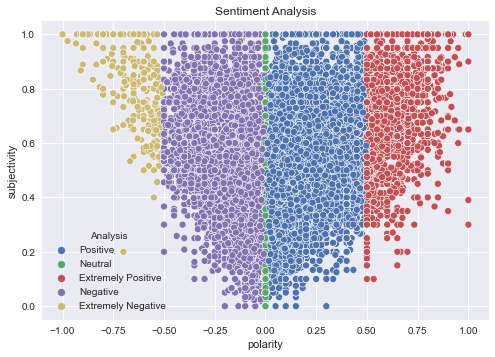

In [22]:
# Plot polarity and Subjectivity
sns.scatterplot(data=df , x='polarity', y='subjectivity',hue='Analysis')
plt.title('Sentiment Analysis')
plt.show()

In [23]:
# Get percentage of extremely positive tweets
eptwts = df[df['Analysis']=='Extremely Positive']
eptwts = eptwts['Tweet']
ep = round((eptwts.shape[0] / df.shape[0])*100,2)
print(str(ep) + ' %')

17.91 %


In [24]:
# Get percentage of positive tweets
ptwts = df[df['Analysis']=='Positive']
ptwts = ptwts['Tweet']
p=round((ptwts.shape[0] / df.shape[0])*100,2)
print(str(p) + ' %')

37.55 %


In [25]:
# Get percentage of nutral tweets
nutwts = df[df['Analysis']=='Neutral']
nutwts = nutwts['Tweet']
nu = round((nutwts.shape[0] / df.shape[0])*100,2)
print(str(nu) + ' %')

26.62 %


In [26]:
# Get percentage of negative tweets
ntwts = df[df['Analysis']=='Negative']
ntwts = ntwts['Tweet']
n = round((ntwts.shape[0] / df.shape[0])*100,2)
print(str(n) + ' %')

15.99 %


In [27]:
# Get percentage of extremely negative tweets
entwts = df[df['Analysis']=='Extremely Negative']
entwts = entwts['Tweet']
en = round((entwts.shape[0] / df.shape[0])*100,2)
print(str(en) + ' %')

1.94 %


Positive              16279
Neutral               11539
Extremely Positive     7765
Negative               6930
Extremely Negative      839
Name: Analysis, dtype: int64


C:\Users\Arpan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Analysis', ylabel='count'>

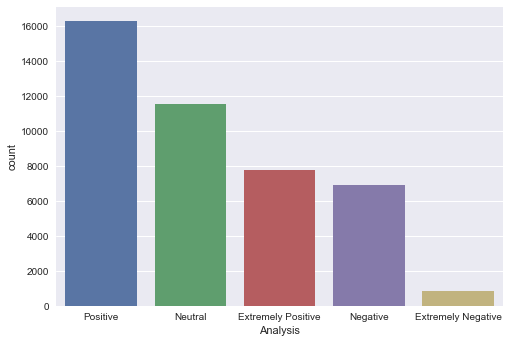

In [28]:
# Show the value counts
vals = df['Analysis'].value_counts()
print(vals)

# Plot and Visualize the counts
sns.countplot(df['Analysis'])

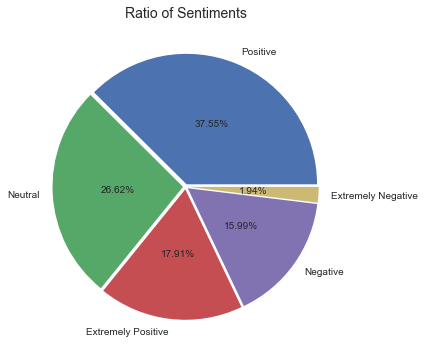

In [29]:
pie, ax = plt.subplots(figsize=[10,6])
labels = vals.keys()
explode=(0, 0.1, 0, 0,0)
plt.pie(x=vals, autopct="%.2f%%", explode=[0.02]*5, labels=labels, pctdistance=0.5)
plt.title("Ratio of Sentiments", fontsize=14);



In [30]:
# removing stop words
eptwts = eptwts.apply(nfx.remove_stopwords).tolist()
ptwts = ptwts.apply(nfx.remove_stopwords).tolist()
nutwts = nutwts.apply(nfx.remove_stopwords).tolist()
ntwts = ntwts.apply(nfx.remove_stopwords).tolist()
entwts = entwts.apply(nfx.remove_stopwords).tolist()

In [31]:
# tokenizing the words for counting
ep_tokens = [token for line in eptwts for token in line.split()]
p_tokens = [token for line in ptwts for token in line.split()]
nu_tokens = [token for line in nutwts for token in line.split()]
n_tokens = [token for line in ntwts for token in line.split()]
en_tokens = [token for line in entwts for token in line.split()]


In [32]:
from collections import Counter

In [33]:
def get_tokens(docx,num=30):
    word_tokens = Counter(docx)
    most_common = word_tokens.most_common(num)
    result = dict(most_common)
    return result

In [34]:
get_tokens(en_tokens)

{'bad': 165,
 'terrible': 114,
 'worst': 78,
 'obama': 78,
 'people': 59,
 'stupid': 56,
 'trump': 53,
 'president': 53,
 'country': 49,
 'hate': 45,
 'deal': 41,
 'badly': 38,
 'crazy': 37,
 'want': 36,
 'horrible': 36,
 'pathetic': 36,
 'democrats': 34,
 'sad': 28,
 'hillary': 28,
 'going': 27,
 'run': 26,
 'like': 26,
 'dont': 25,
 'boring': 25,
 'said': 25,
 'desperate': 23,
 'job': 23,
 'cont': 21,
 'fake': 21,
 'thing': 20}

In [35]:
# getting most common words
most_common_ex_pos_words = get_tokens(ep_tokens)
most_common_pos_words = get_tokens(p_tokens)
most_common_neut_words = get_tokens(nu_tokens)
most_common_neg_words = get_tokens(n_tokens)
most_common_ex_neg_words = get_tokens(en_tokens)




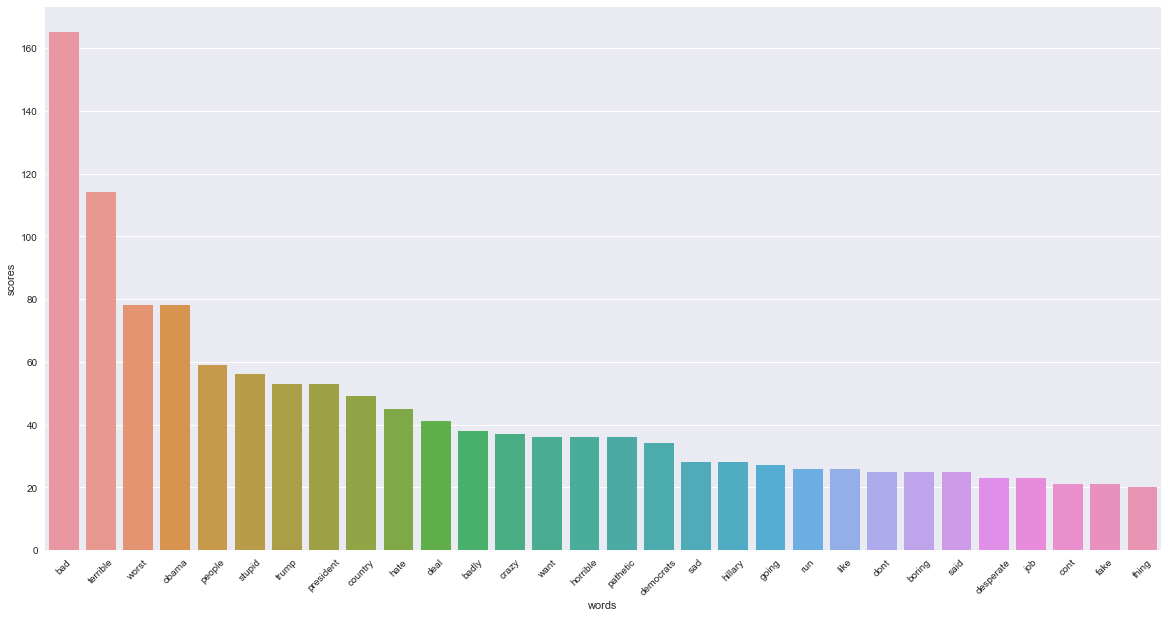

In [36]:
# Plot most common extreme negative words with seaborn
ex_neg_df = pd.DataFrame(most_common_ex_neg_words.items(),columns=['words','scores'])
plt.figure(figsize=(20,10))
sns.barplot(x='words',y='scores',data=ex_neg_df)
plt.xticks(rotation=45)
plt.show()

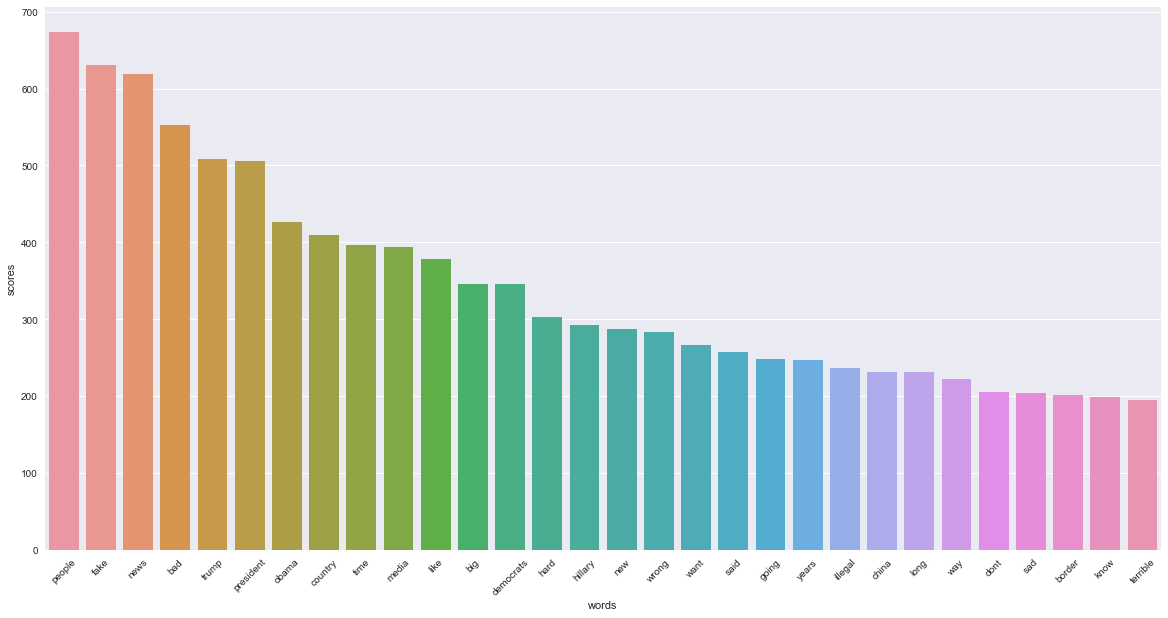

In [37]:
# Plot most common negative words with seaborn
neg_df = pd.DataFrame(most_common_neg_words.items(),columns=['words','scores'])
plt.figure(figsize=(20,10))
sns.barplot(x='words',y='scores',data=neg_df)
plt.xticks(rotation=45)
plt.show()

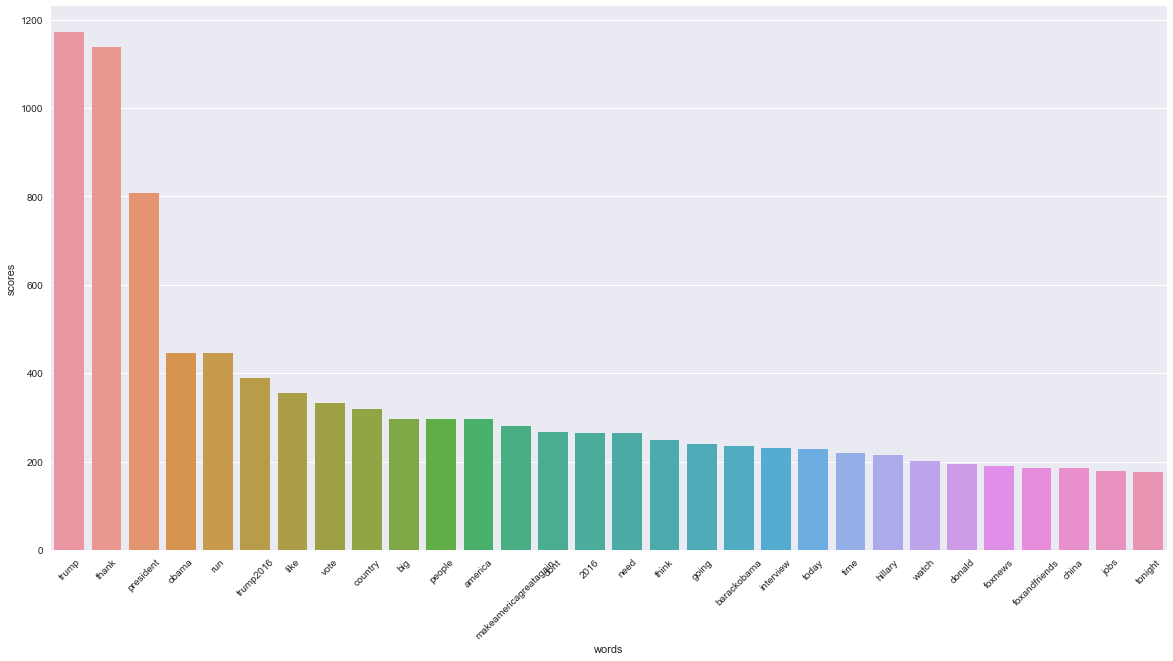

In [38]:
# Plot most common neutral words with seaborn
neut_df = pd.DataFrame(most_common_neut_words.items(),columns=['words','scores'])
plt.figure(figsize=(20,10))
sns.barplot(x='words',y='scores',data=neut_df)
plt.xticks(rotation=45)
plt.show()

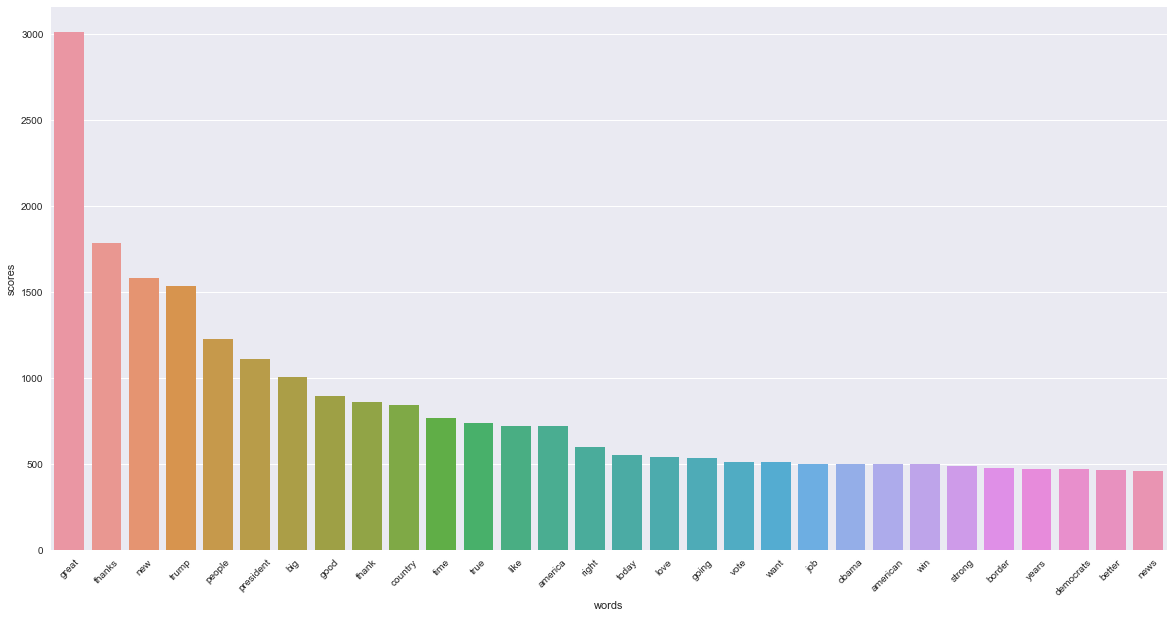

In [39]:
# Plot most common positive words with seaborn
pos_df = pd.DataFrame(most_common_pos_words.items(),columns=['words','scores'])
plt.figure(figsize=(20,10))
sns.barplot(x='words',y='scores',data=pos_df)
plt.xticks(rotation=45)
plt.show()

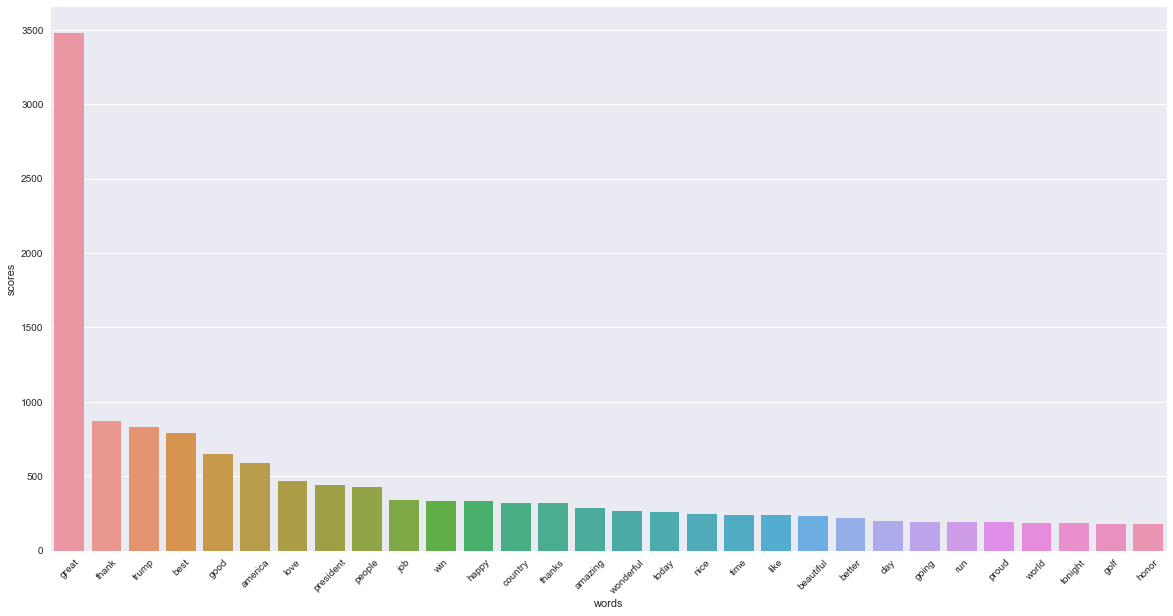

In [40]:
# Plot most common extreme positive words with seaborn
ex_pos_df = pd.DataFrame(most_common_ex_pos_words.items(),columns=['words','scores'])
plt.figure(figsize=(20,10))
sns.barplot(x='words',y='scores',data=ex_pos_df)
plt.xticks(rotation=45)
plt.show()

In [41]:
# function for plotting wordcloud
def plot_wordcloud(docx):
    plt.figure(figsize=(10,8))
    mywordcloud = WordCloud().generate(docx)
    plt.imshow(mywordcloud,interpolation='bilinear')
    plt.axis('off')
    plt.show()

In [42]:
ex_pos_docx = ' '.join(ep_tokens)
pos_docx = ' '.join(p_tokens)
neu_docx = ' '.join(nu_tokens)
neg_docx = ' '.join(n_tokens)
ex_neg_docx = ' '.join(en_tokens)


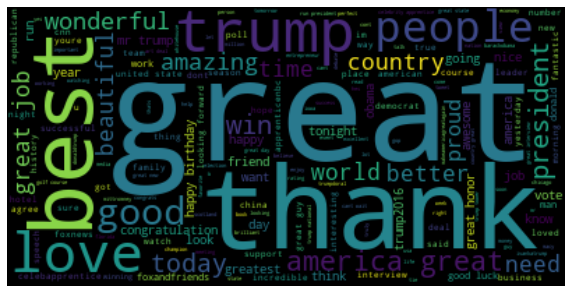

In [43]:
# Plotting word cloud of exteremly positive words
plot_wordcloud(ex_pos_docx)

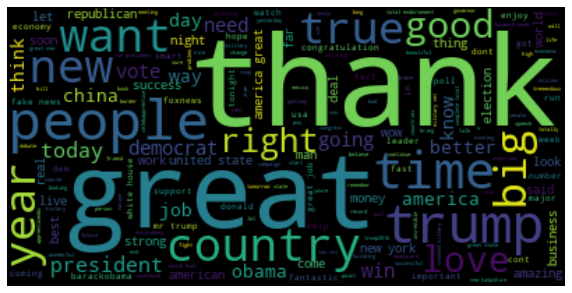

In [44]:
# Plotting word cloud of positive words 
plot_wordcloud(pos_docx)

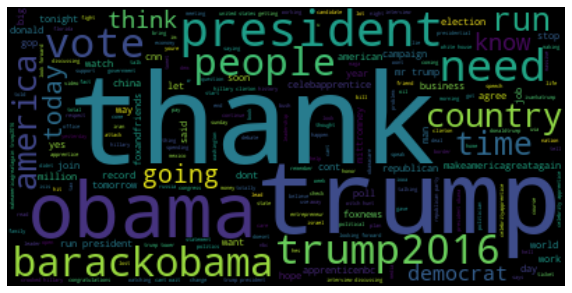

In [45]:
# Plotting word cloud of neutral words
plot_wordcloud(neu_docx)

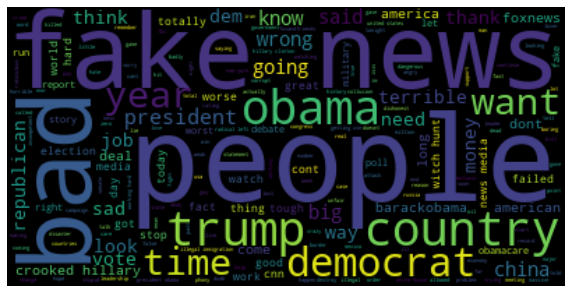

In [46]:
# Plotting word cloud of negative words
plot_wordcloud(neg_docx)

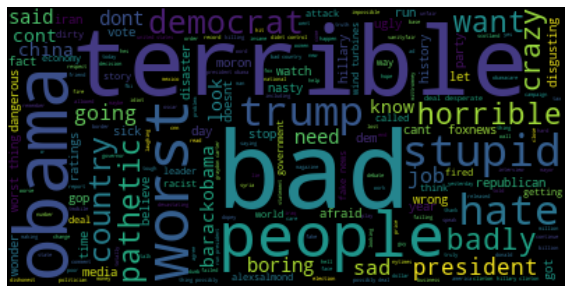

In [47]:
# Plotting word cloud of exteremly negative words
plot_wordcloud(ex_neg_docx)